# Austrilian housing case study

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house.

In [1]:
import sys
import os
path = os.path.join(os.path.dirname(os.path.realpath('__file__')), "lib")
sys.path.append(path)
print(path)

/Users/naren/Documents/GIT/AustrilianHousingCaseStudy/lib


# 1. Importing and analyzing the data

In [2]:
from myLibrary import *
import os

file = 'AustralianHousingMarket.csv'

## Analyzing the data

In [3]:
data = importData(file)

dataExploration(data)

Data Head:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

None

Data Describe:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Data shape: (1460, 81)
Data columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQu

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [4]:
# Let's drop the column `Id`, Also lets get colums with null values greater then 70%
data = data.drop('Id', axis=1)


### Handling Null values
Let's First fill in the Null values as requried by interpolating from other values or drop them if we cant anticipate the missing values.

In [5]:
# Checking the percentage of missing values
col_grt_70 = dataPercentageNullValues(data,70)
col_grt_70

Alley          93.77
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

In [6]:
# Dropping coloumns more then 70% null values since these features dont add any value for our analysis
data = data.drop(col_grt_70.keys(), axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
#Lets get all the coloumns with non null values
# Checking the percentage of missing values
col_non_null = dataPercentageNullValues(data)
col_non_null

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

In [8]:
# Lets drop FireplaceQu since it has 47.26% null values
data = data.drop(['FireplaceQu'], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
# Let's see what's happening with GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond null values
data[data['GarageType'].isnull()][['GarageYrBlt','GarageFinish', 'GarageQual', 'GarageCond']]

,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN
...,...,...,...,...
1349,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN


In [10]:
# Expect for GarageYrBlt we can set ['GarageType','GarageFinish', 'GarageQual', 'GarageCond'] to 'No Garage'
data.loc[data['GarageType'].isnull(), ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']] = 'No Garage'
data[data['GarageYrBlt'].isnull()][['GarageType','GarageFinish', 'GarageQual', 'GarageCond']]

,GarageType,GarageFinish,GarageQual,GarageCond
39,No Garage,No Garage,No Garage,No Garage
48,No Garage,No Garage,No Garage,No Garage
78,No Garage,No Garage,No Garage,No Garage
88,No Garage,No Garage,No Garage,No Garage
89,No Garage,No Garage,No Garage,No Garage
...,...,...,...,...
1349,No Garage,No Garage,No Garage,No Garage
1407,No Garage,No Garage,No Garage,No Garage
1449,No Garage,No Garage,No Garage,No Garage
1450,No Garage,No Garage,No Garage,No Garage


In [11]:
# Lets fill GarageYrBlt to 0
data.loc[data['GarageYrBlt'].isnull(), ['GarageYrBlt']] = 0

In [12]:
# Lets get all the coloumns with non null values
# Checking the percentage of missing values
col_non_null = dataPercentageNullValues(data)
col_non_null

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
dtype: float64

In [13]:
# Let's drop 'Electrical' that have null values
data[data['Electrical'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,167500


In [14]:
# One entry with no electrtical drop the entry
data.drop(data.loc[data['Electrical'].isnull()].index, inplace=True)
col_non_null = dataPercentageNullValues(data)
col_non_null

LotFrontage     17.75
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.54
BsmtCond         2.54
BsmtExposure     2.60
BsmtFinType1     2.54
BsmtFinType2     2.60
dtype: float64

In [15]:
data[data['MasVnrType'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,216500
529,20,RL,NaN,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,200,0,0,0,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2008,WD,Normal,237000


In [16]:
# When 'MasVnrType' is Null, It means there is no Masonry lets Type to 'None' and 'MasVnrArea' as zero
data.loc[data['MasVnrType'].isnull(), ['MasVnrType']] = 'None'
data.loc[data['MasVnrArea'].isnull(), ['MasVnrArea']] = 0

In [17]:
col_non_null = dataPercentageNullValues(data)
col_non_null

LotFrontage     17.75
BsmtQual         2.54
BsmtCond         2.54
BsmtExposure     2.60
BsmtFinType1     2.54
BsmtFinType2     2.60
dtype: float64

In [18]:
# Let's see what's happening with 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' null values
data[data['BsmtQual'].isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [19]:
# data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].value_counts()
data['BsmtQual'].value_counts()

TA    649
Gd    617
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [20]:
data['BsmtCond'].value_counts()

TA    1310
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [21]:
data['BsmtExposure'].value_counts()

No    952
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [22]:
data['BsmtFinType1'].value_counts()

Unf    429
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [23]:
data['BsmtFinType2'].value_counts()

Unf    1255
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [24]:
# ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'] are null becaues they dont have basement lets set them to 'No Basement'

data.loc[data['BsmtQual'].isnull(), ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = 'No Basement'
data[data['BsmtQual'].isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,No Basement,No Basement,No Basement,No Basement
39,NaN,No Basement,No Basement,No Basement,No Basement
90,NaN,No Basement,No Basement,No Basement,No Basement
102,NaN,No Basement,No Basement,No Basement,No Basement
156,NaN,No Basement,No Basement,No Basement,No Basement
182,NaN,No Basement,No Basement,No Basement,No Basement
259,NaN,No Basement,No Basement,No Basement,No Basement
342,NaN,No Basement,No Basement,No Basement,No Basement
362,NaN,No Basement,No Basement,No Basement,No Basement
371,NaN,No Basement,No Basement,No Basement,No Basement


In [25]:
data.loc[data['BsmtQual'].isnull(), ['BsmtQual']] = 'No Basement'

In [26]:
col_non_null = dataPercentageNullValues(data)
col_non_null

LotFrontage     17.75
BsmtExposure     0.07
BsmtFinType2     0.07
dtype: float64

In [27]:
# Now lets start working on 'BsmtExposure' and 'BsmtFinType2'
data['BsmtExposure'].value_counts()

No             952
Av             221
Gd             134
Mn             114
No Basement     37
Name: BsmtExposure, dtype: int64

In [28]:
data['BsmtFinType2'].value_counts()

Unf            1255
Rec              54
LwQ              46
No Basement      37
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [29]:
data[data['BsmtFinType2'].isnull()][['BsmtFinType2','BsmtFinSF2','BsmtExposure']]

,BsmtFinType2,BsmtFinSF2,BsmtExposure
332,NaN,479,No


In [30]:
# Basement finishtype2 Nan but has square foot, We cannot fill this with valuable information, We can drop this entry
data.drop(data.loc[data['BsmtFinType2'].isnull()].index, inplace=True)
col_non_null = dataPercentageNullValues(data)
col_non_null

LotFrontage     17.76
BsmtExposure     0.07
dtype: float64

In [31]:
data[data['BsmtExposure'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2006,WD,Normal,192500


In [32]:
# Let's drop the entry with exposure since we dont know if we want to fill with 'No Exposure' or 'No Basement'
data.drop(data.loc[data['BsmtExposure'].isnull()].index, inplace=True)
col_non_null = dataPercentageNullValues(data)
col_non_null

LotFrontage    17.78
dtype: float64

In [33]:
# Let's see what is happening with LotFrontage
data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [34]:
data[data['LotFrontage'].isnull()][['Street', 'LandContour', 'Condition1', 'Condition2','MSZoning','YearBuilt']]

,Street,LandContour,Condition1,Condition2,MSZoning,YearBuilt
7,Pave,Lvl,PosN,Norm,RL,1973
12,Pave,Lvl,Norm,Norm,RL,1962
14,Pave,Lvl,Norm,Norm,RL,1960
16,Pave,Lvl,Norm,Norm,RL,1970
24,Pave,Lvl,Norm,Norm,RL,1968
...,...,...,...,...,...,...
1429,Pave,Lvl,Norm,Norm,RL,1981
1431,Pave,Lvl,Norm,Norm,RL,1976
1441,Pave,Lvl,Norm,Norm,RM,2004
1443,Pave,Lvl,Norm,Norm,RL,1916


In [35]:
# LotFrontage: Linear feet of street connected to property
# All the missing value have 'Street' as 'Pave' lets see what is the mean value and other details for same
data[(data['Street'] == 'Pave')].describe()['LotFrontage']

count    1193.000000
mean       69.974853
std        24.281716
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [36]:
# Mean and 50% are close to each other at 70, Lets set the missing value for 'LotFrontage' as 70
data.loc[((data['Street'] == 'Pave') & data['LotFrontage'].isnull()), ['LotFrontage']] = 70
col_non_null = dataPercentageNullValues(data)
col_non_null

LotFrontage    0.07
dtype: float64

In [37]:
data[data['LotFrontage'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
335,190,RL,NaN,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,...,0,0,0,0,700,8,2008,WD,Normal,228950


In [38]:
# We still have one Entry with null value we can drop that entry
data.drop(data.loc[data['LotFrontage'].isnull()].index, inplace=True)
col_non_null = dataPercentageNullValues(data)
col_non_null

Series([], dtype: float64)

### Handle data types and handle data
Lets make sure all the data types are correct and also get the list of categorical and continous variables in seperate lists

In [39]:
pd.DataFrame(data.dtypes)

,0
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [40]:
# Convert the data type of column 'Date' from string (YYYY/MM/DD) to datetime64
date_col = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']
data[date_col]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,MoSold
0,2003,2003,2003.0,2008,2
1,1976,1976,1976.0,2007,5
2,2001,2002,2001.0,2008,9
3,1915,1970,1998.0,2006,2
4,2000,2000,2000.0,2008,12
...,...,...,...,...,...
1455,1999,2000,1999.0,2007,8
1456,1978,1988,1978.0,2010,2
1457,1941,2006,1941.0,2010,5
1458,1950,1996,1950.0,2010,4


In [41]:
data['dateSold'] = data[['MoSold', 'YrSold']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
date_col.append('dateSold')
data[date_col]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,MoSold,dateSold
0,2003,2003,2003.0,2008,2,2-2008
1,1976,1976,1976.0,2007,5,5-2007
2,2001,2002,2001.0,2008,9,9-2008
3,1915,1970,1998.0,2006,2,2-2006
4,2000,2000,2000.0,2008,12,12-2008
...,...,...,...,...,...,...
1455,1999,2000,1999.0,2007,8,8-2007
1456,1978,1988,1978.0,2010,2,2-2010
1457,1941,2006,1941.0,2010,5,5-2010
1458,1950,1996,1950.0,2010,4,4-2010


In [42]:
# Convert GrargeYrBlt to int
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)
data[date_col]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,MoSold,dateSold
0,2003,2003,2003,2008,2,2-2008
1,1976,1976,1976,2007,5,5-2007
2,2001,2002,2001,2008,9,9-2008
3,1915,1970,1998,2006,2,2-2006
4,2000,2000,2000,2008,12,12-2008
...,...,...,...,...,...,...
1455,1999,2000,1999,2007,8,8-2007
1456,1978,1988,1978,2010,2,2-2010
1457,1941,2006,1941,2010,5,5-2010
1458,1950,1996,1950,2010,4,4-2010


In [43]:
data[data['GarageYrBlt'] == 0]['GarageType']

39      No Garage
48      No Garage
78      No Garage
88      No Garage
89      No Garage
          ...    
1349    No Garage
1407    No Garage
1449    No Garage
1450    No Garage
1453    No Garage
Name: GarageType, Length: 81, dtype: object

In [44]:
data[data['GarageYrBlt'] == 0][date_col]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,MoSold,dateSold
39,1955,1955,0,2008,6,6-2008
48,1920,2008,0,2009,6,6-2009
78,1968,1968,0,2010,4,4-2010
88,1915,1982,0,2009,10,10-2009
89,1994,1995,0,2007,8,8-2007
...,...,...,...,...,...,...
1349,1872,1987,0,2008,12,12-2008
1407,1985,1985,0,2009,3,3-2009
1449,1970,1970,0,2006,8,8-2006
1450,1974,1974,0,2009,9,9-2009


In [45]:
data[data['GarageYrBlt'] == 0]['GarageType'].value_counts()

No Garage    81
Name: GarageType, dtype: int64

In [46]:
data.loc[data['GarageYrBlt'] == 0,'GarageYrBlt'] = data['YrSold']
data['GarageYrBlt'] = pd.to_datetime(data['GarageYrBlt'], format='%Y')

data['dateSold'] = pd.to_datetime(data['dateSold'], format='%m-%Y')
data['YearBuilt'] = pd.to_datetime(data['YearBuilt'], format='%Y')
data['YearRemodAdd'] = pd.to_datetime(data['YearRemodAdd'], format='%Y')
data[date_col]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,MoSold,dateSold
0,2003-01-01,2003-01-01,2003-01-01,2008,2,2008-02-01
1,1976-01-01,1976-01-01,1976-01-01,2007,5,2007-05-01
2,2001-01-01,2002-01-01,2001-01-01,2008,9,2008-09-01
3,1915-01-01,1970-01-01,1998-01-01,2006,2,2006-02-01
4,2000-01-01,2000-01-01,2000-01-01,2008,12,2008-12-01
...,...,...,...,...,...,...
1455,1999-01-01,2000-01-01,1999-01-01,2007,8,2007-08-01
1456,1978-01-01,1988-01-01,1978-01-01,2010,2,2010-02-01
1457,1941-01-01,2006-01-01,1941-01-01,2010,5,2010-05-01
1458,1950-01-01,1996-01-01,1950-01-01,2010,4,2010-04-01


In [47]:
# Drop YrSold and MoSold
data.drop('YrSold', axis=1, inplace=True)
date_col.remove('YrSold')
data.drop('MoSold', axis=1, inplace=True)
date_col.remove('MoSold')

In [48]:
data[date_col].dtypes

YearBuilt       datetime64[ns]
YearRemodAdd    datetime64[ns]
GarageYrBlt     datetime64[ns]
dateSold        datetime64[ns]
dtype: object

In [49]:
data[date_col]

,YearBuilt,YearRemodAdd,GarageYrBlt,dateSold
0,2003-01-01,2003-01-01,2003-01-01,2008-02-01
1,1976-01-01,1976-01-01,1976-01-01,2007-05-01
2,2001-01-01,2002-01-01,2001-01-01,2008-09-01
3,1915-01-01,1970-01-01,1998-01-01,2006-02-01
4,2000-01-01,2000-01-01,2000-01-01,2008-12-01
...,...,...,...,...
1455,1999-01-01,2000-01-01,1999-01-01,2007-08-01
1456,1978-01-01,1988-01-01,1978-01-01,2010-02-01
1457,1941-01-01,2006-01-01,1941-01-01,2010-05-01
1458,1950-01-01,1996-01-01,1950-01-01,2010-04-01


In [50]:
# Lets Create new coloumns one that says if remodeled or not.
# Second coloum to indicate the age of the building at the time of sale
# Let's generate same the age of the garage.
data['houseAge'] = data['dateSold'].dt.year - data['YearRemodAdd'].dt.year
date_col.append('houseAge')
data['garageAge'] = data['dateSold'].dt.year - data['GarageYrBlt'].dt.year
date_col.append('garageAge')
data[date_col]

,YearBuilt,YearRemodAdd,GarageYrBlt,dateSold,houseAge,garageAge
0,2003-01-01,2003-01-01,2003-01-01,2008-02-01,5,5
1,1976-01-01,1976-01-01,1976-01-01,2007-05-01,31,31
2,2001-01-01,2002-01-01,2001-01-01,2008-09-01,6,7
3,1915-01-01,1970-01-01,1998-01-01,2006-02-01,36,8
4,2000-01-01,2000-01-01,2000-01-01,2008-12-01,8,8
...,...,...,...,...,...,...
1455,1999-01-01,2000-01-01,1999-01-01,2007-08-01,7,8
1456,1978-01-01,1988-01-01,1978-01-01,2010-02-01,22,32
1457,1941-01-01,2006-01-01,1941-01-01,2010-05-01,4,69
1458,1950-01-01,1996-01-01,1950-01-01,2010-04-01,14,60


In [51]:
# Add a coloum of 'yes' and 'no' indicated if Remodel was done
data.loc[data['YearBuilt'] == data['YearRemodAdd'], 'RemodelState'] = 'No'
data.loc[data['YearBuilt'] != data['YearRemodAdd'], 'RemodelState'] = 'Yes'
date_col.append('RemodelState')
data[date_col]

,YearBuilt,YearRemodAdd,GarageYrBlt,dateSold,houseAge,garageAge,RemodelState
0,2003-01-01,2003-01-01,2003-01-01,2008-02-01,5,5,No
1,1976-01-01,1976-01-01,1976-01-01,2007-05-01,31,31,No
2,2001-01-01,2002-01-01,2001-01-01,2008-09-01,6,7,Yes
3,1915-01-01,1970-01-01,1998-01-01,2006-02-01,36,8,Yes
4,2000-01-01,2000-01-01,2000-01-01,2008-12-01,8,8,No
...,...,...,...,...,...,...,...
1455,1999-01-01,2000-01-01,1999-01-01,2007-08-01,7,8,Yes
1456,1978-01-01,1988-01-01,1978-01-01,2010-02-01,22,32,Yes
1457,1941-01-01,2006-01-01,1941-01-01,2010-05-01,4,69,Yes
1458,1950-01-01,1996-01-01,1950-01-01,2010-04-01,14,60,Yes


In [52]:
data = data.drop(['1stFlrSF', '2ndFlrSF'],axis=1)

In [53]:
# Now we can drop 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt',	'dateSold' since we have derived new coloumns
data.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt',	'dateSold'],axis =1, inplace=True)
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'

In [54]:
dataGetValueCountsPct(data)

Percentage value counts: MSSubClass
40      0.27
180     0.69
45      0.82
75      1.10
85      1.37
190     1.99
90      3.57
80      3.91
70      4.12
160     4.33
30      4.74
120     5.98
50      9.89
60     20.47
20     36.74
Name: MSSubClass, dtype: float64
Percentage value counts: MSZoning
C (all)     0.69
RH          1.10
FV          4.46
RM         14.97
RL         78.78
Name: MSZoning, dtype: float64
Percentage value counts: LotFrontage
46.0      0.07
137.0     0.07
39.0      0.07
112.0     0.07
141.0     0.07
         ...  
75.0      3.64
50.0      3.91
80.0      4.74
60.0      9.82
70.0     22.53
Name: LotFrontage, Length: 110, dtype: float64
Percentage value counts: LotArea
9717     0.07
21695    0.07
7314     0.07
5389     0.07
9590     0.07
         ... 
9000     0.96
8400     0.96
6000     1.17
9600     1.65
7200     1.72
Name: LotArea, Length: 1069, dtype: float64
Percentage value counts: Street
Grvl     0.34
Pave    99.66
Name: Street, dtype: float64
Percentage value 

In [55]:
bias_features = ['SaleCondition', 'SaleType', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'KitchenAbvGr', 'BsmtHalfBath', 'LowQualFinSF', 'Electrical','CentralAir','Heating','BsmtFinSF2','BsmtFinType2', 'BsmtCond', 'ExterCond', 'RoofMatl', 'BldgType', 'Condition2', 'Condition1', 'LandSlope', 'Utilities', 'LandContour', 'Street']
dataGetValueCountsPct(data[bias_features])

Percentage value counts: SaleCondition
AdjLand     0.27
Alloca      0.82
Family      1.37
Abnorml     6.94
Partial     8.59
Normal     82.01
Name: SaleCondition, dtype: float64
Percentage value counts: SaleType
Con       0.14
Oth       0.21
CWD       0.27
ConLI     0.34
ConLw     0.34
ConLD     0.62
COD       2.95
New       8.38
WD       86.74
Name: SaleType, dtype: float64
Percentage value counts: MiscVal
2500      0.07
8300      0.07
350       0.07
1400      0.07
560       0.07
620       0.07
15500     0.07
800       0.07
1150      0.07
54        0.07
3500      0.07
1300      0.07
480       0.14
1200      0.14
2000      0.27
450       0.27
700       0.27
600       0.27
500       0.55
400       0.76
0        96.50
Name: MiscVal, dtype: float64
Percentage value counts: PoolArea
512     0.07
648     0.07
576     0.07
555     0.07
480     0.07
519     0.07
738     0.07
0      99.52
Name: PoolArea, dtype: float64
Percentage value counts: ScreenPorch
60      0.07
165     0.07
260     0.07


> Features in the list 'bias_features' have very biased features. They have values biased to above 80%. These values might bias our algorithims, For now drop these features, We will use these feaetures for manual analysis but want to avoid them in the machine algorithim.
---
> ['SaleCondition', 'SaleType', 'MiscVal', 'PoolArea', 'ScreenPorch', 
'3SsnPorch', 'EnclosedPorch', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'KitchenAbvGr', 'BsmtHalfBath', 'LowQualFinSF', 'Electrical','CentralAir','Heating','BsmtFinSF2','BsmtFinType2', 'BsmtCond', 'ExterCond', 'RoofMatl', 'BldgType', 'Condition2', 'Condition1', 'LandSlope', 'Utilities', 'LandContour', 'Street']


In [56]:
# Create a new data frame with out above coloumns list
df = data.drop(bias_features, axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,houseAge,garageAge,RemodelState
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,Attchd,RFn,2,548,0,61,208500,5,5,No
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,Attchd,RFn,2,460,298,0,181500,31,31,No
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,Attchd,RFn,2,608,0,42,223500,6,7,Yes
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,Detchd,Unf,3,642,0,35,140000,36,8,Yes
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,Attchd,RFn,3,836,192,84,250000,8,8,No


In [57]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'houseAge', 'garageAge', 'RemodelState'],
      dtype='object')

In [58]:
df.dtypes

MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
LotShape         object
LotConfig        object
Neighborhood     object
HouseStyle       object
OverallQual       int64
OverallCond       int64
RoofStyle        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
Foundation       object
BsmtQual         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
HeatingQC        object
GrLivArea         int64
BsmtFullBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenQual      object
TotRmsAbvGrd      int64
Fireplaces        int64
GarageType       object
GarageFinish     object
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
OpenPorchSF       int64
SalePrice         int64
houseAge          int64
garageAge         int64
RemodelState    

In [59]:
var = ['GarageCars' , 'Fireplaces', 'TotRmsAbvGrd', 'HalfBath', 'FullBath', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath' , 'BedroomAbvGr']
df[var] = df[var].astype('object')

In [60]:
#['GarageCars' , 'Fireplaces', 'TotRmsAbvGrd', 'HalfBath', 'FullBath', 'MSSubClass']
cont_features = df.select_dtypes(include=['float64','int64'])
discrete_features = df.select_dtypes(include=['object'])


In [61]:
cont_features

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,houseAge,garageAge
0,65.0,8450,196.0,706,150,856,1710,548,0,61,208500,5,5
1,80.0,9600,0.0,978,284,1262,1262,460,298,0,181500,31,31
2,68.0,11250,162.0,486,434,920,1786,608,0,42,223500,6,7
3,60.0,9550,0.0,216,540,756,1717,642,0,35,140000,36,8
4,84.0,14260,350.0,655,490,1145,2198,836,192,84,250000,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,953,953,1647,460,0,40,175000,7,8
1456,85.0,13175,119.0,790,589,1542,2073,500,349,0,210000,22,32
1457,66.0,9042,0.0,275,877,1152,2340,252,0,60,266500,4,69
1458,68.0,9717,0.0,49,0,1078,1078,240,366,0,142125,14,60


In [62]:
discrete_features

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,...,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,RemodelState
0,60,RL,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,...,2,1,3,Gd,8,0,Attchd,RFn,2,No
1,20,RL,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,...,2,0,3,TA,6,1,Attchd,RFn,2,No
2,60,RL,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,...,2,1,3,Gd,6,1,Attchd,RFn,2,Yes
3,70,RL,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,...,1,0,3,Gd,7,1,Detchd,Unf,3,Yes
4,60,RL,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,...,2,1,4,Gd,9,1,Attchd,RFn,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Reg,Inside,Gilbert,2Story,6,5,Gable,VinylSd,...,2,1,3,TA,7,1,Attchd,RFn,2,Yes
1456,20,RL,Reg,Inside,NWAmes,1Story,6,6,Gable,Plywood,...,2,0,3,TA,7,2,Attchd,Unf,2,Yes
1457,70,RL,Reg,Inside,Crawfor,2Story,7,9,Gable,CemntBd,...,2,0,4,Gd,9,2,Attchd,RFn,1,Yes
1458,20,RL,Reg,Inside,NAmes,1Story,5,6,Hip,MetalSd,...,1,0,2,Gd,5,0,Attchd,Unf,1,Yes


## Data Visualization

Lets analyize continous variables and there relation with the target variable 'SalePrice'.

#### Continous variable

In [63]:
cont_features.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice', 'houseAge', 'garageAge'],
      dtype='object')

In [64]:
cont_features = cont_features.drop('SalePrice', axis=1)
scale_features = list(cont_features.columns)
print(scale_features)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'houseAge', 'garageAge']


In [65]:
cont_features.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'houseAge', 'garageAge'],
      dtype='object')

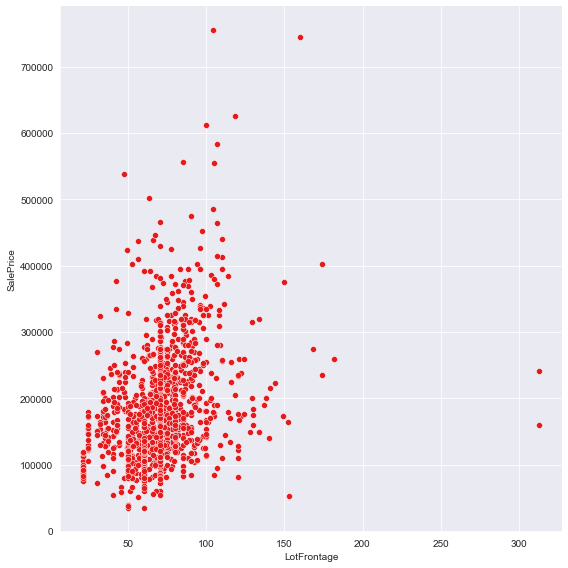

In [66]:
feature = 'LotFrontage'
dataPairPlotVisualization(data, feature, 'SalePrice')

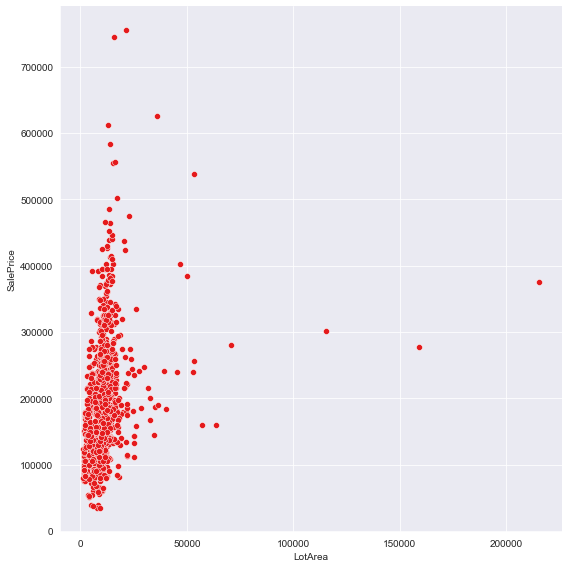

In [67]:
feature = 'LotArea'
dataPairPlotVisualization(data, feature, 'SalePrice')

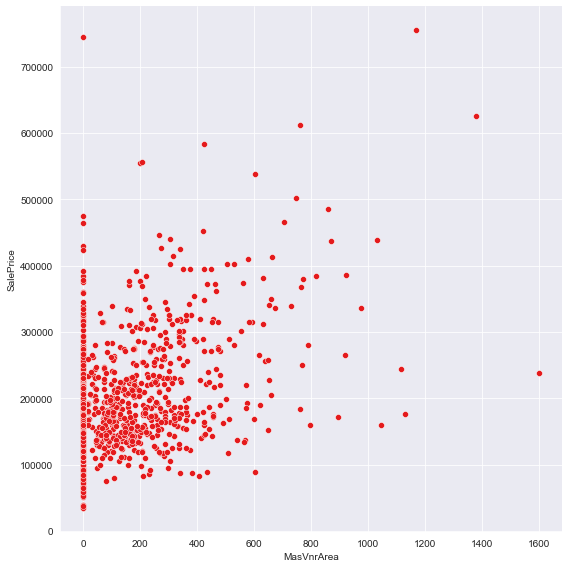

In [68]:
feature = 'MasVnrArea'
dataPairPlotVisualization(data, feature, 'SalePrice')

Masonry vaneer area has a positive effect on sale price

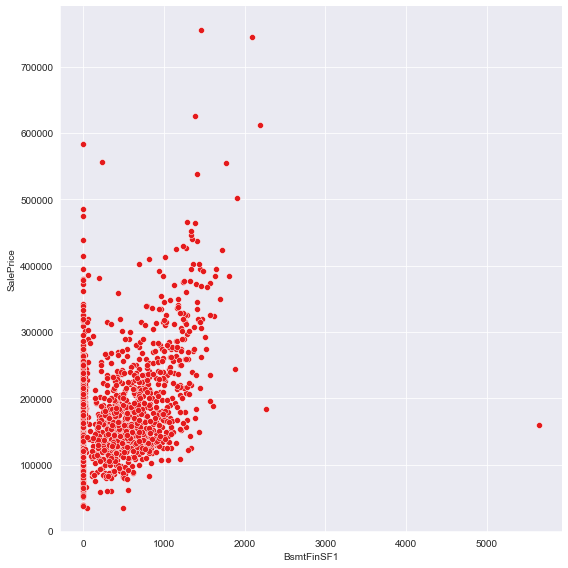

In [69]:
feature = 'BsmtFinSF1'
dataPairPlotVisualization(data, feature, 'SalePrice')

Finished Basement, increase the cost of the House

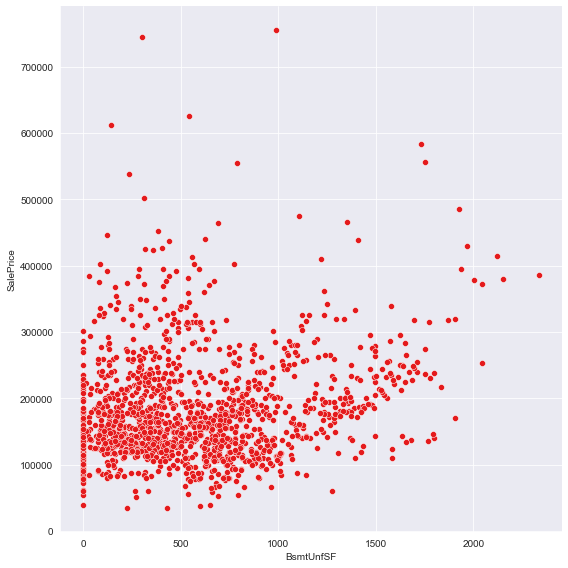

In [70]:
feature = 'BsmtUnfSF'
dataPairPlotVisualization(data, feature, 'SalePrice')

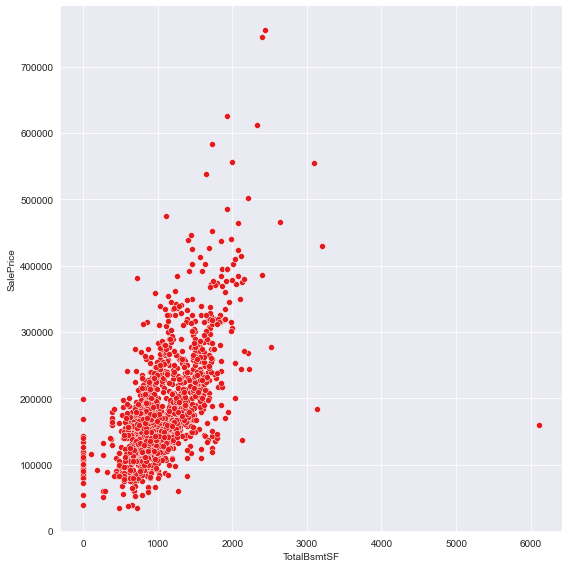

In [71]:
feature = 'TotalBsmtSF'
dataPairPlotVisualization(data, feature, 'SalePrice')

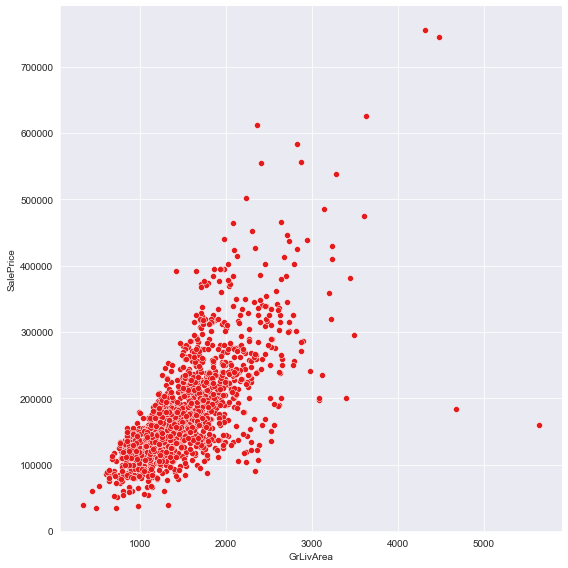

In [72]:
feature = 'GrLivArea'
dataPairPlotVisualization(data, feature, 'SalePrice')

Higher living area means higher sales price

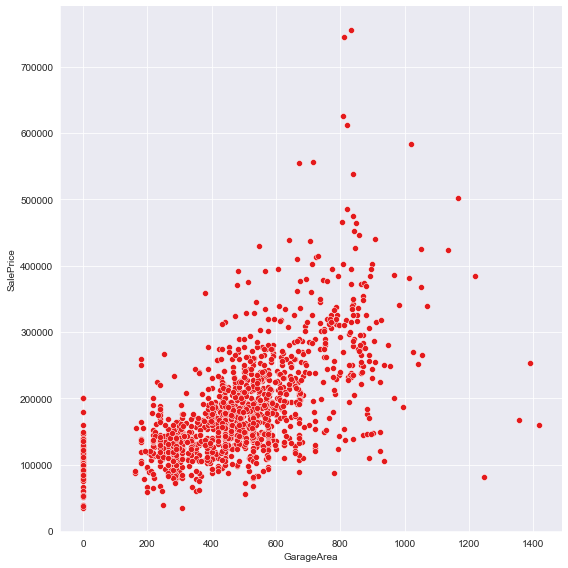

In [73]:
feature = 'GarageArea'
dataPairPlotVisualization(data, feature, 'SalePrice')

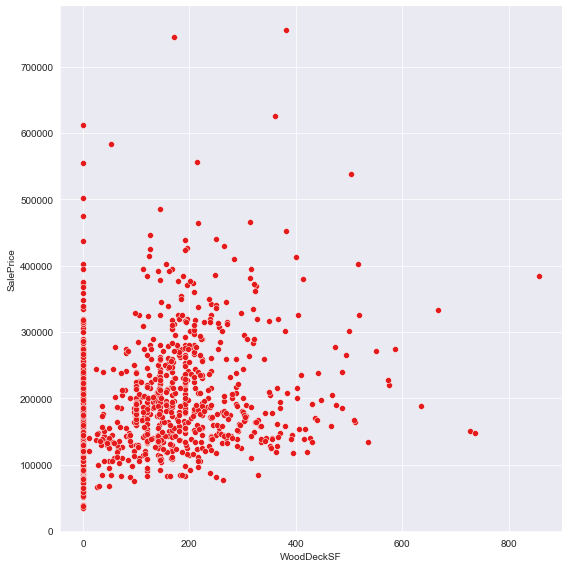

In [74]:
feature = 'WoodDeckSF'
dataPairPlotVisualization(data, feature, 'SalePrice')

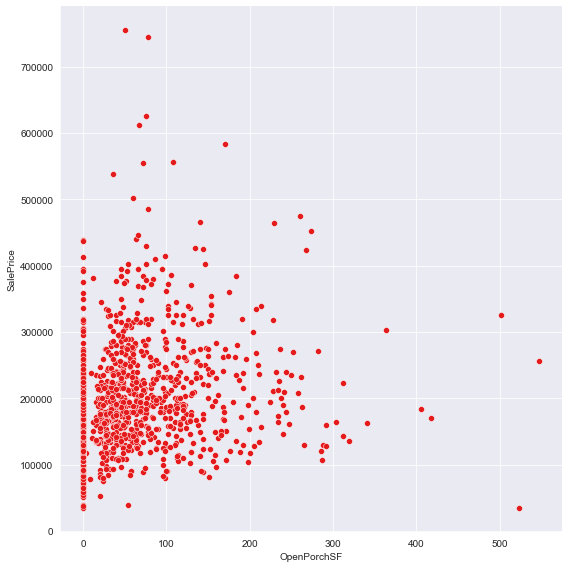

In [75]:
feature = 'OpenPorchSF'
dataPairPlotVisualization(data, feature, 'SalePrice')

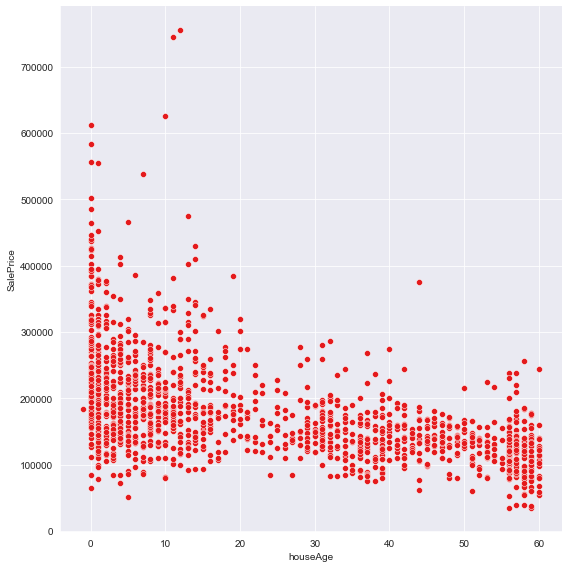

In [76]:
feature = 'houseAge'
dataPairPlotVisualization(data, feature, 'SalePrice')

AS expected, Newer houses have higher Sale price.

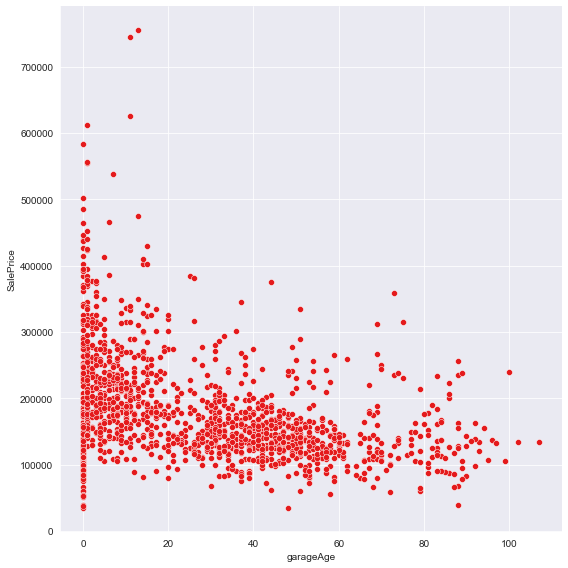

In [77]:
feature = 'garageAge'
dataPairPlotVisualization(data, feature, 'SalePrice')

#### Discrete variables

In [78]:
discrete_features.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageFinish', 'GarageCars', 'RemodelState'],
      dtype='object')

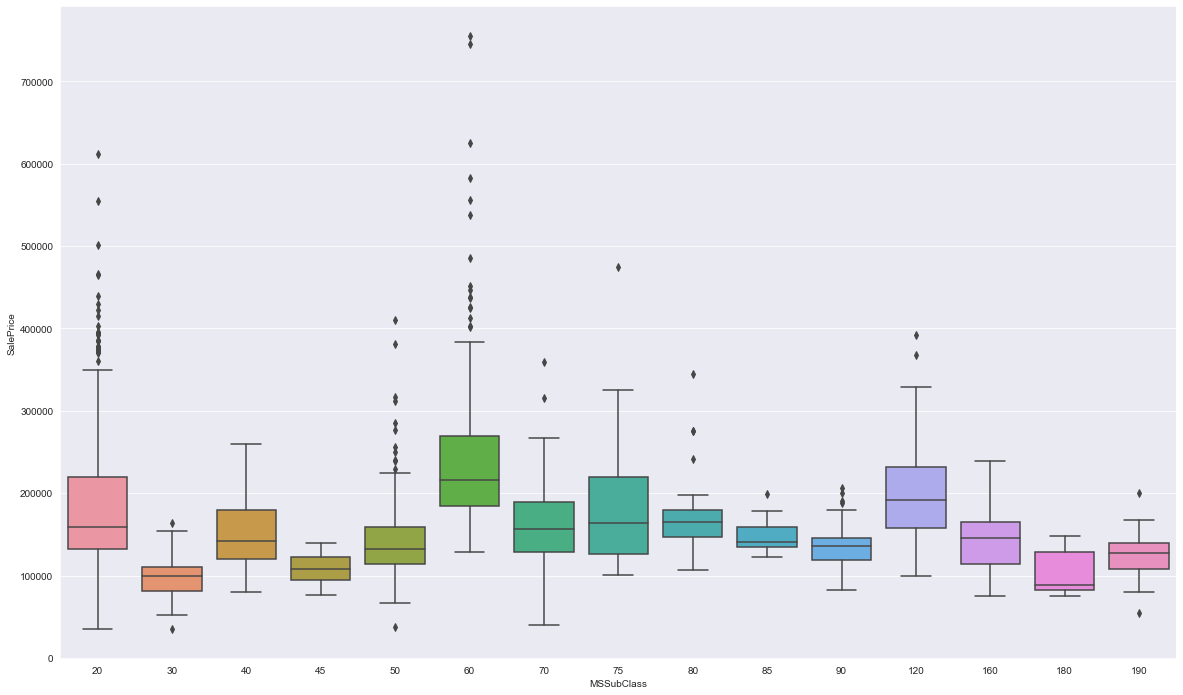

In [79]:
feature = 'MSSubClass'
dataBoxPlotVisualization(df,feature,'SalePrice')

'MSSubClass' it shows newer dwelling 20,60,120 has higher mean of sales price as well as higher max values. 

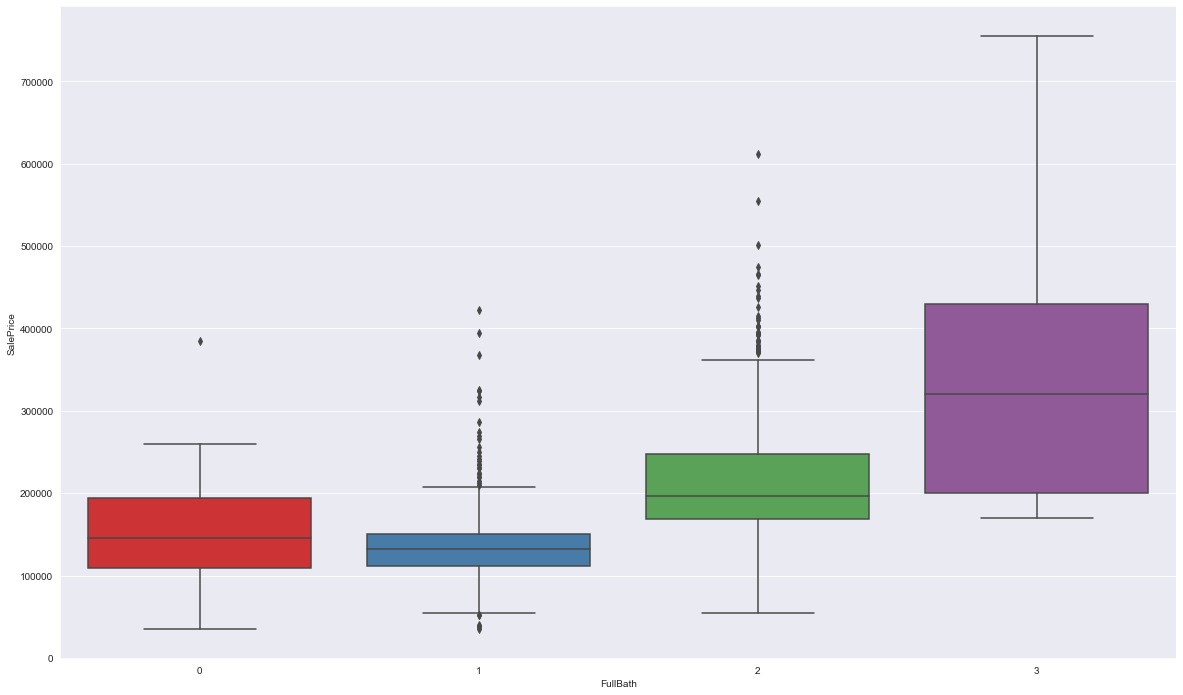

In [80]:
feature = 'FullBath'
dataBoxPlotVisualization(df,feature,'SalePrice')

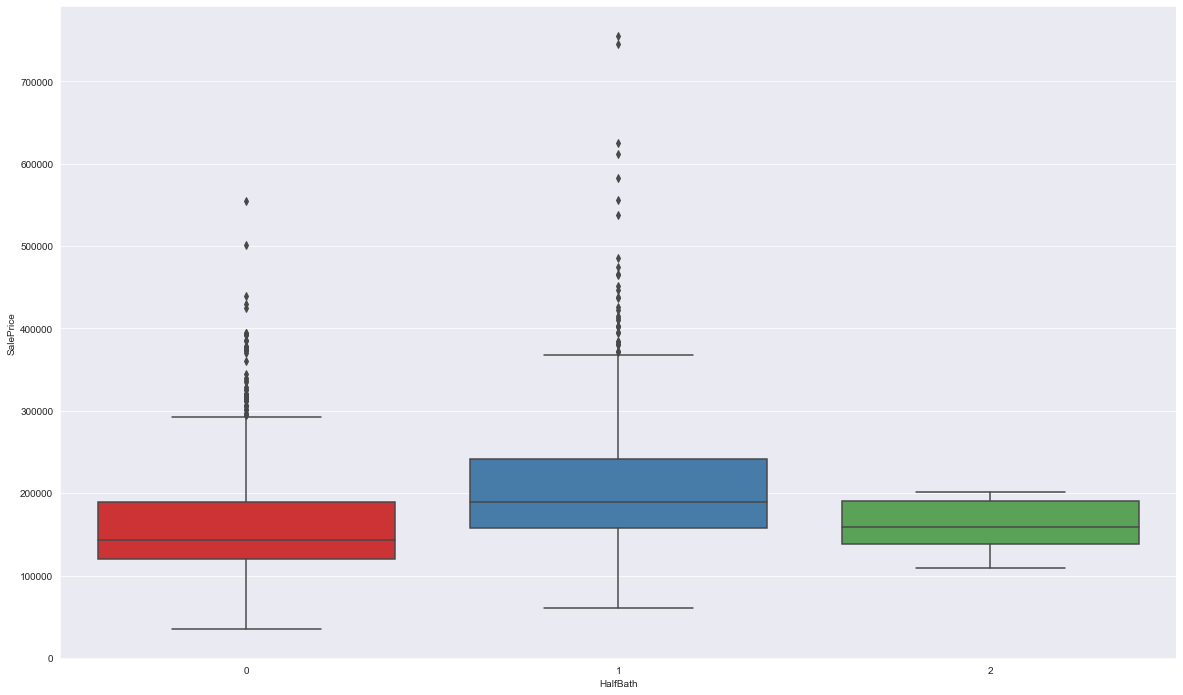

In [81]:
feature = 'HalfBath'
dataBoxPlotVisualization(df,feature,'SalePrice')

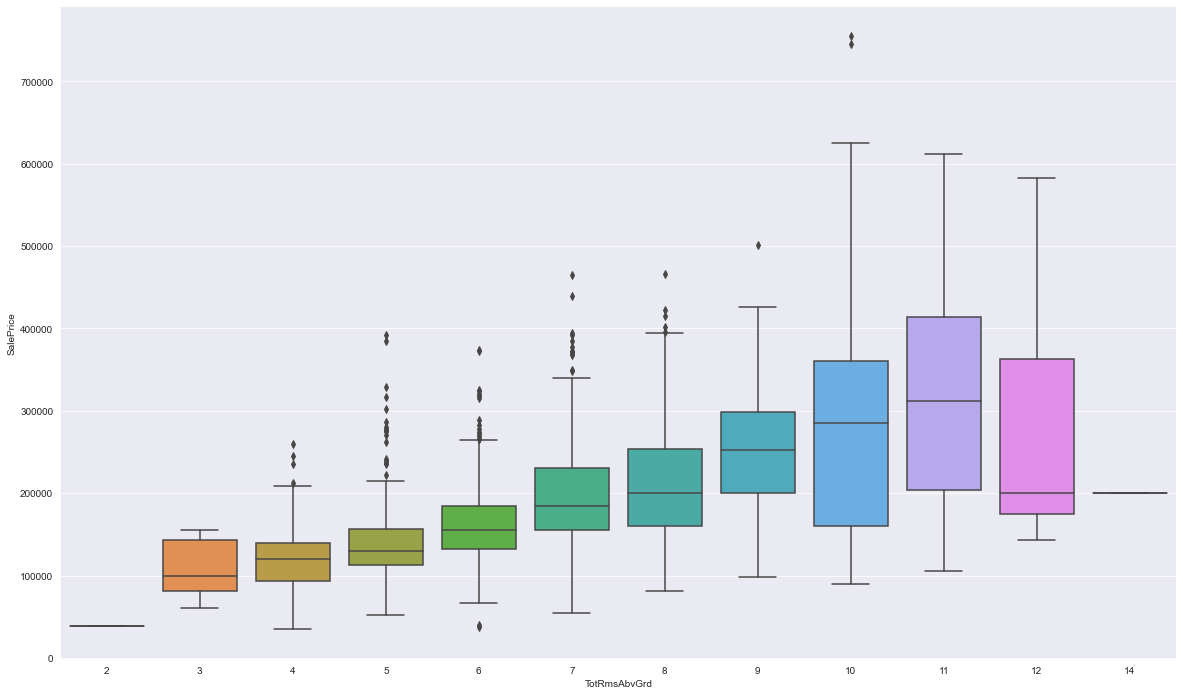

In [82]:
feature = 'TotRmsAbvGrd'
dataBoxPlotVisualization(df,feature,'SalePrice')

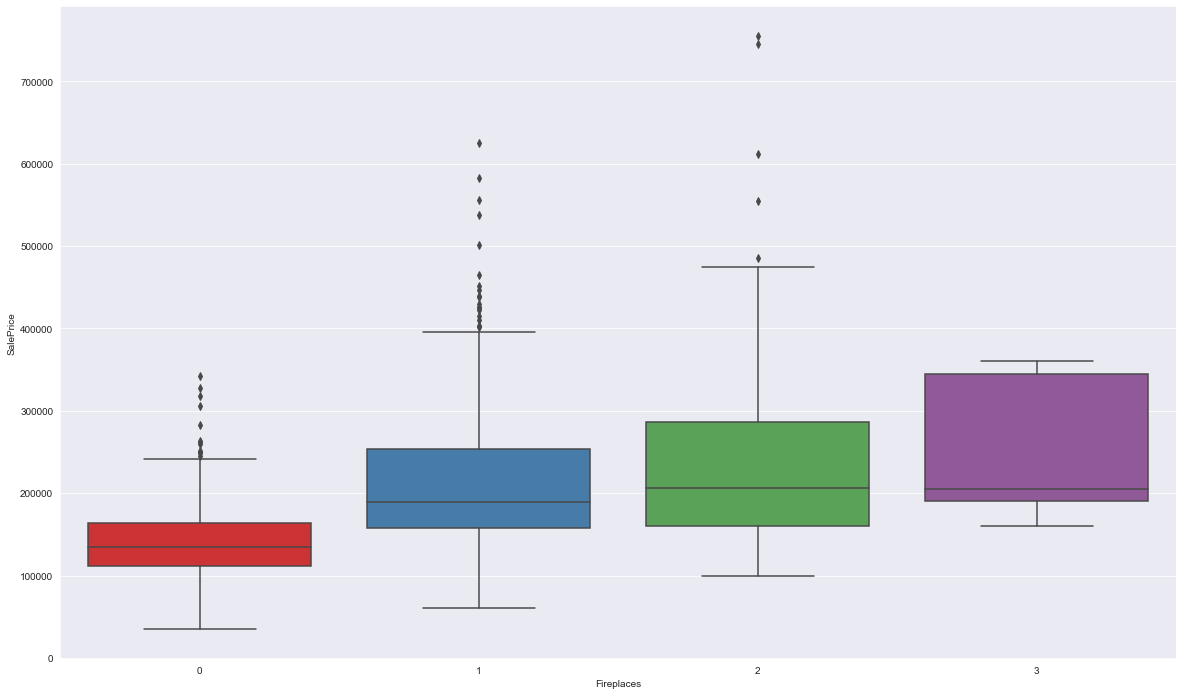

In [83]:
feature = 'Fireplaces'
dataBoxPlotVisualization(df,feature,'SalePrice')

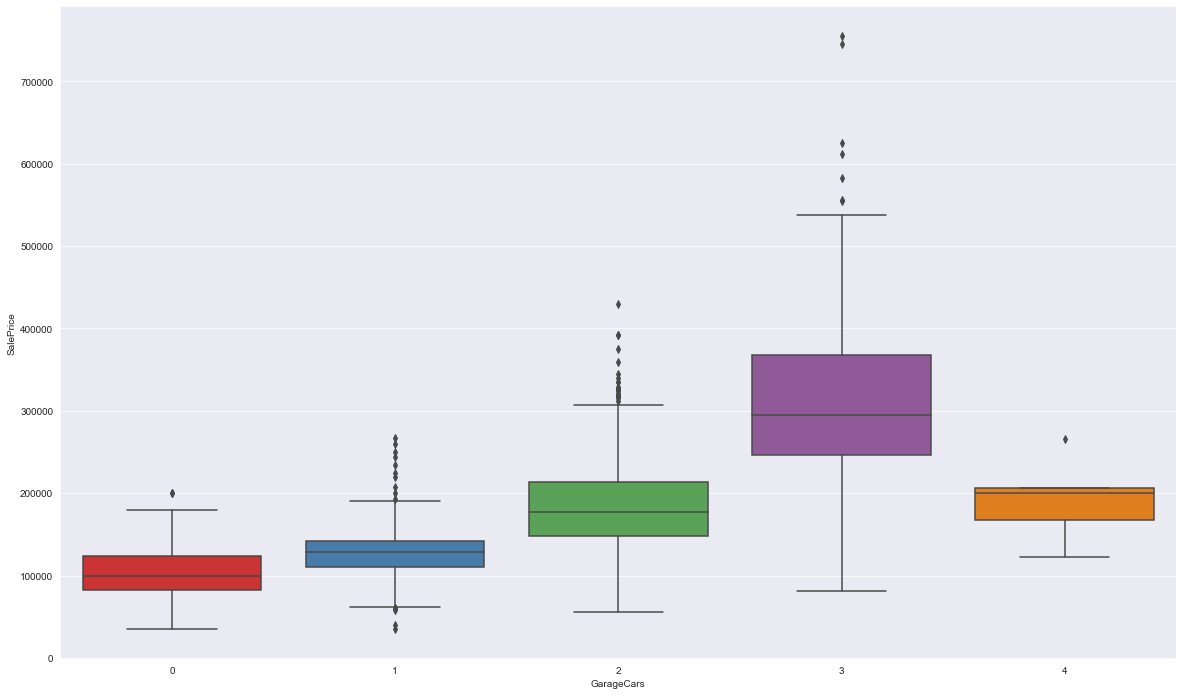

In [84]:
feature = 'GarageCars'
dataBoxPlotVisualization(df,feature,'SalePrice')

Number of 'GarageCars' at 3 has higher mean 'salePrice', For some reason 'GarageCars' with 4 has lower mean value.

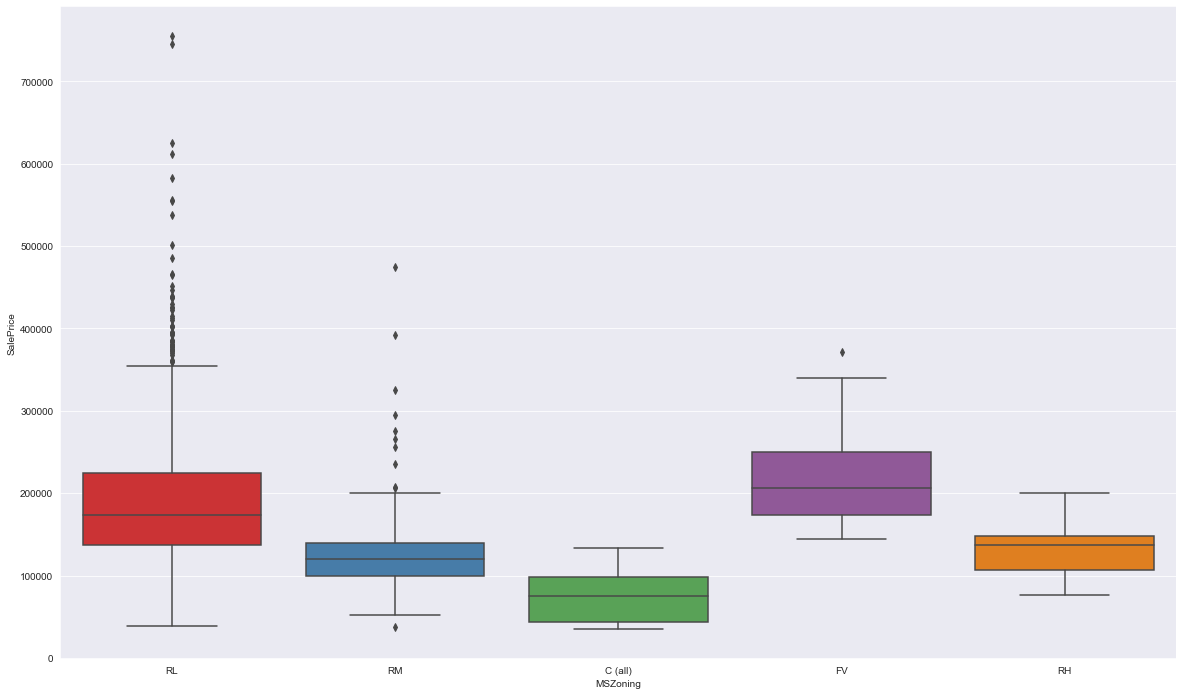

In [85]:
feature = 'MSZoning'
dataBoxPlotVisualization(df,feature,'SalePrice')

MSZoning in Low density and Floating village residental has high mean value for SalePrice, Low density has even more houses sold at higer pricess then any other zoning region
Comerial zoning region has the lowest sale price as expected. 

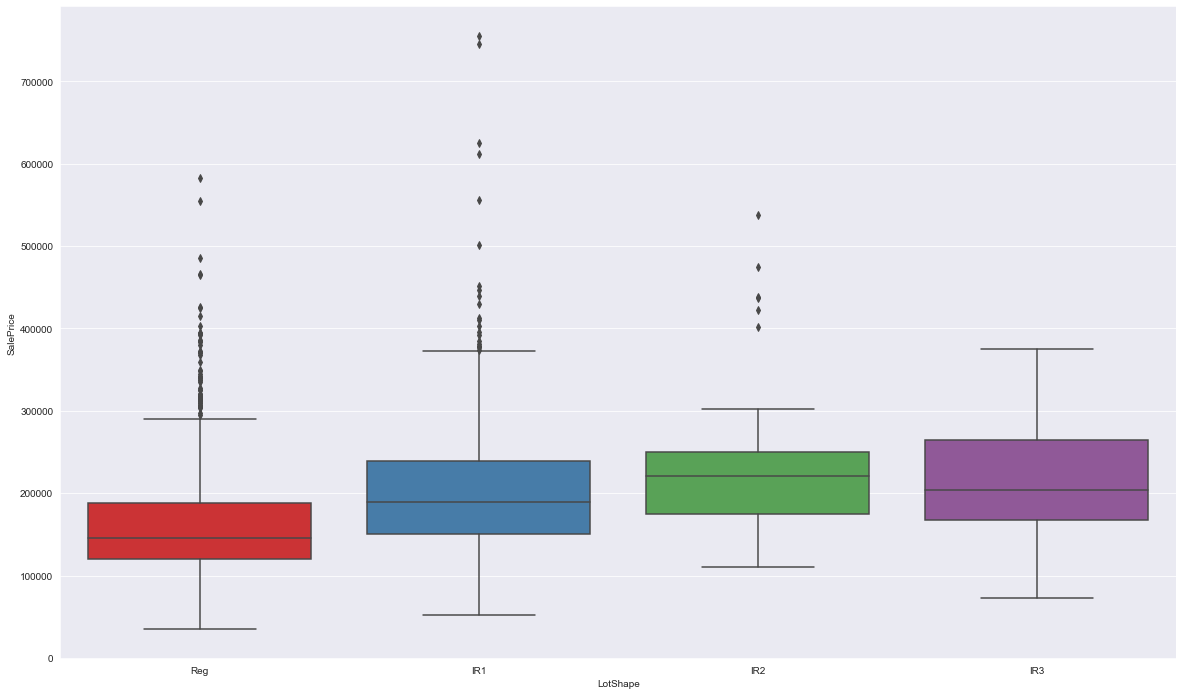

In [86]:
feature = 'LotShape'
dataBoxPlotVisualization(df,feature,'SalePrice')

Lot shape does not have much effect on the sale price

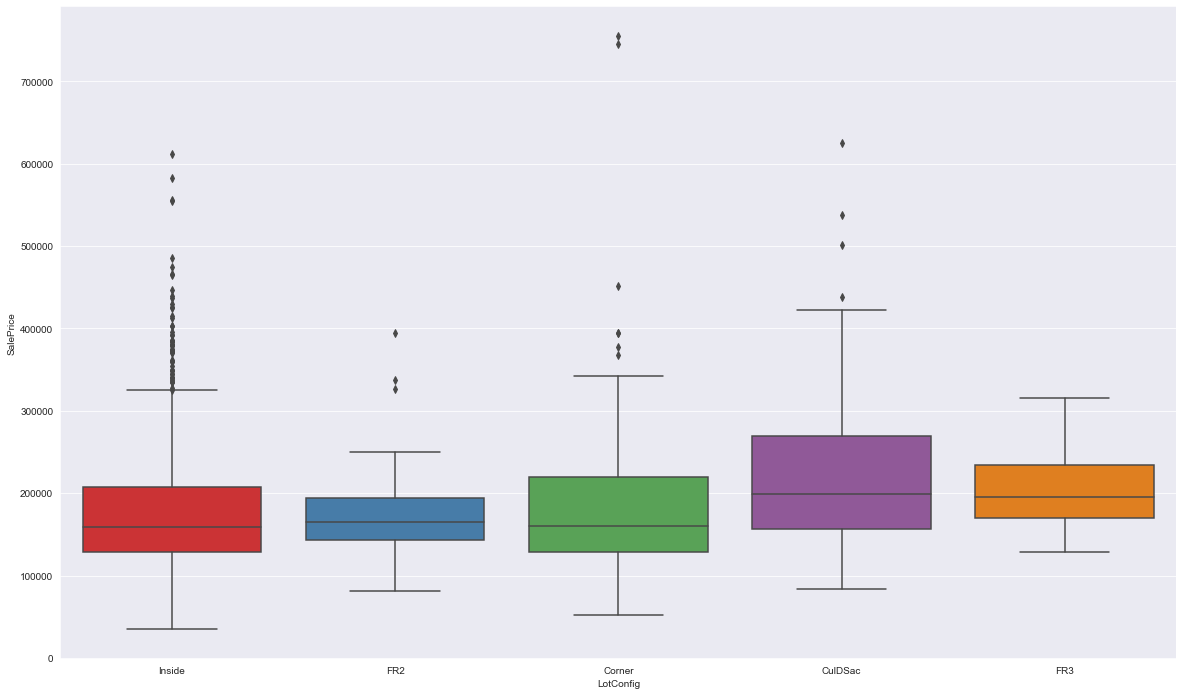

In [87]:
feature = 'LotConfig'
dataBoxPlotVisualization(df,feature,'SalePrice')

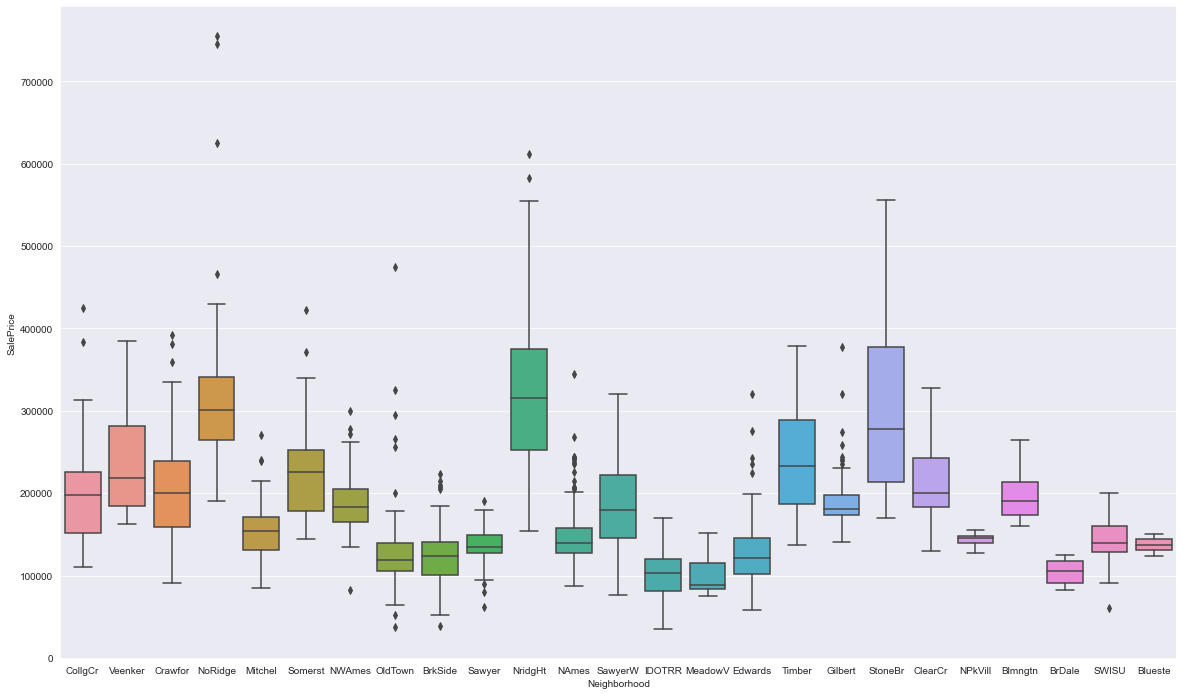

In [88]:
feature = 'Neighborhood'
dataBoxPlotVisualization(df,feature,'SalePrice')

Northridge, Northridge Heights, Stone Brook Neighborhood has high mean 'SalePrice' compared to other neighborhood's. 

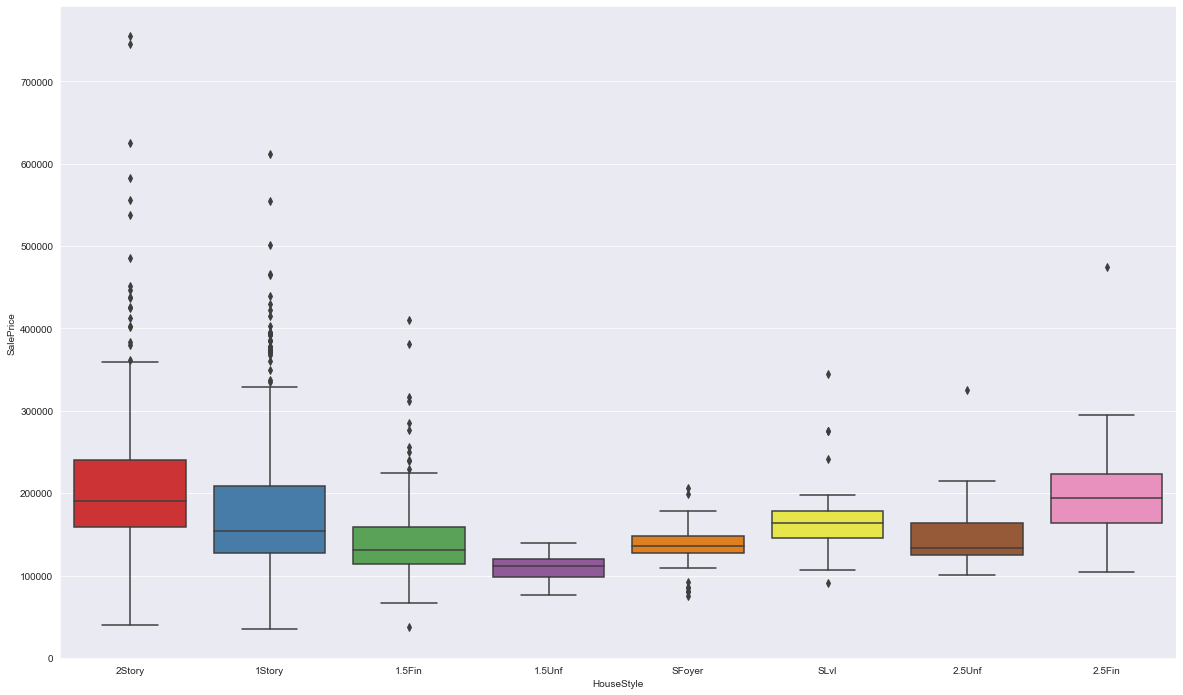

In [89]:
feature = 'HouseStyle'
dataBoxPlotVisualization(df,feature,'SalePrice')

Higher the dwellings has higher SalePrice

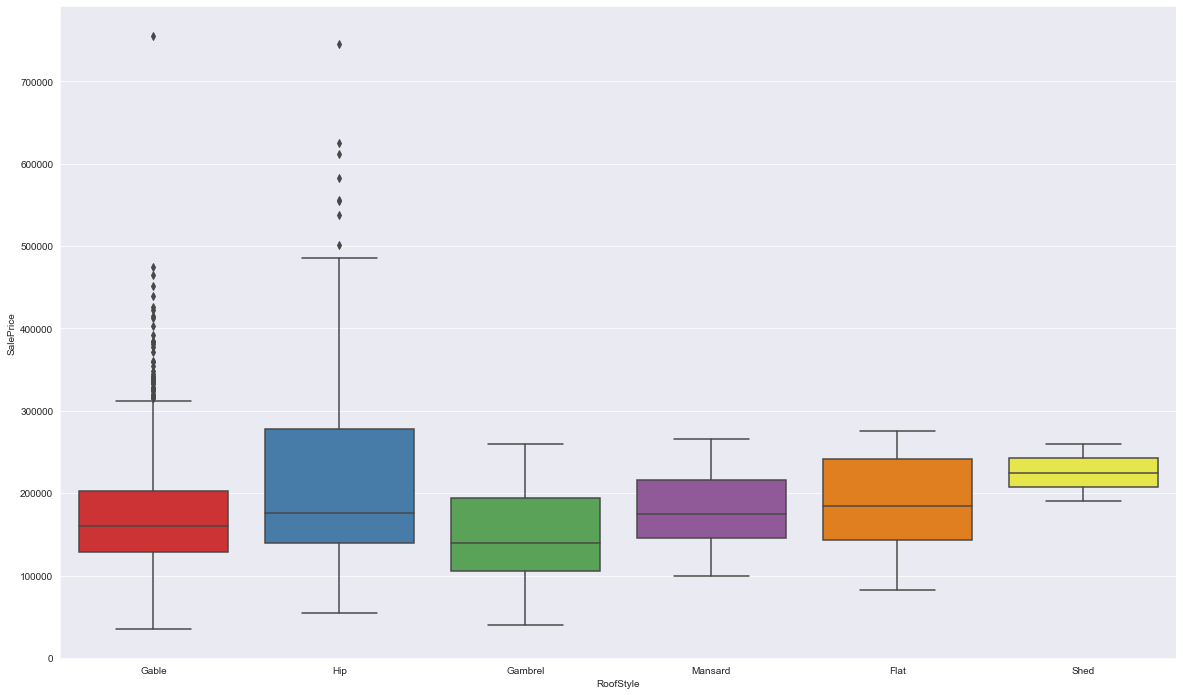

In [90]:
feature = 'RoofStyle'
dataBoxPlotVisualization(df,feature,'SalePrice')

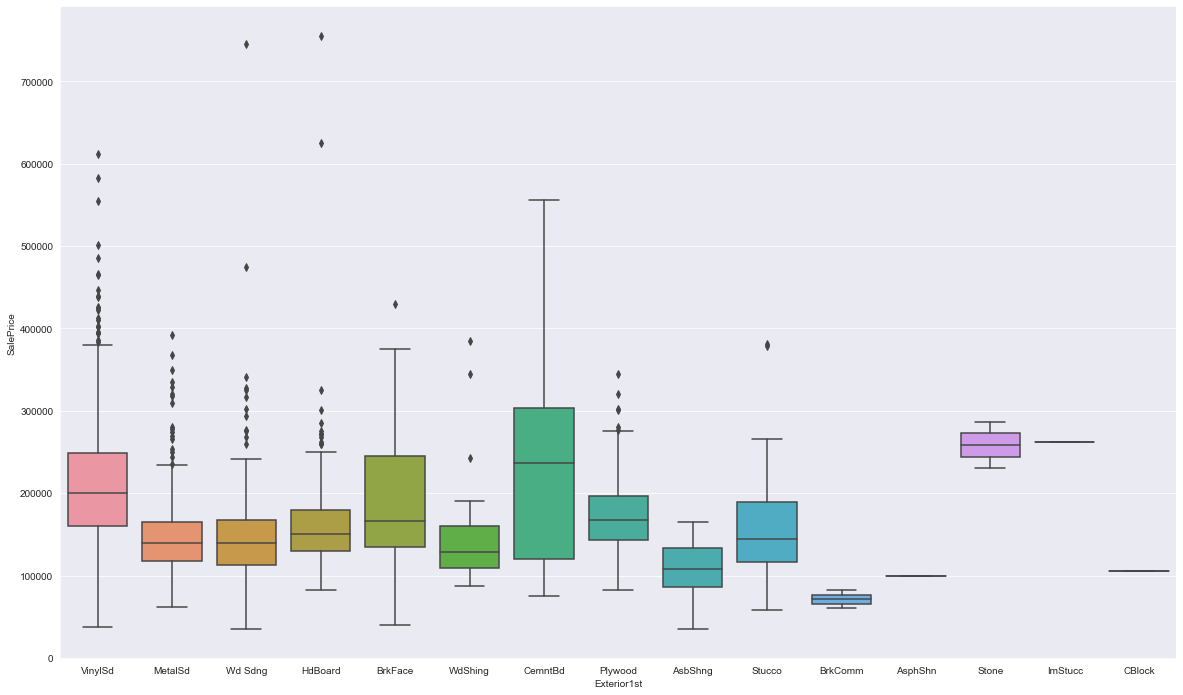

In [91]:
feature = 'Exterior1st'
dataBoxPlotVisualization(df,feature,'SalePrice')

Brick FAce, Asbestos shingles, Cinder Block has negative effect on the sale price. 

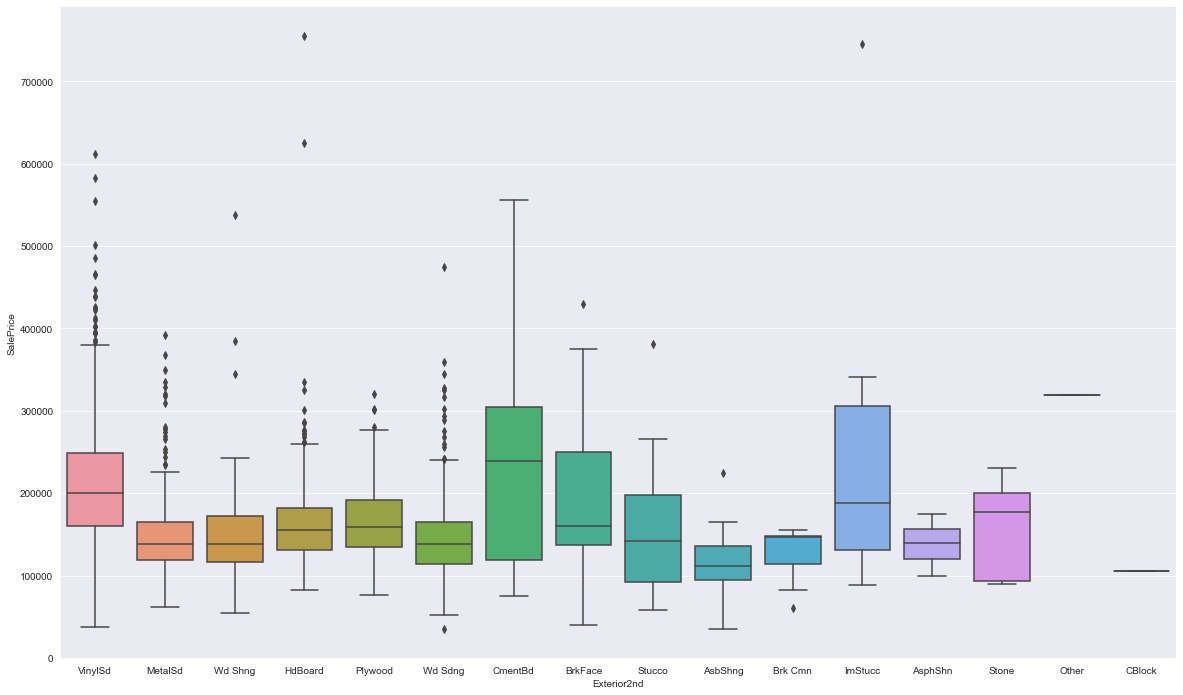

In [92]:
feature = 'Exterior2nd'
dataBoxPlotVisualization(df,feature,'SalePrice')

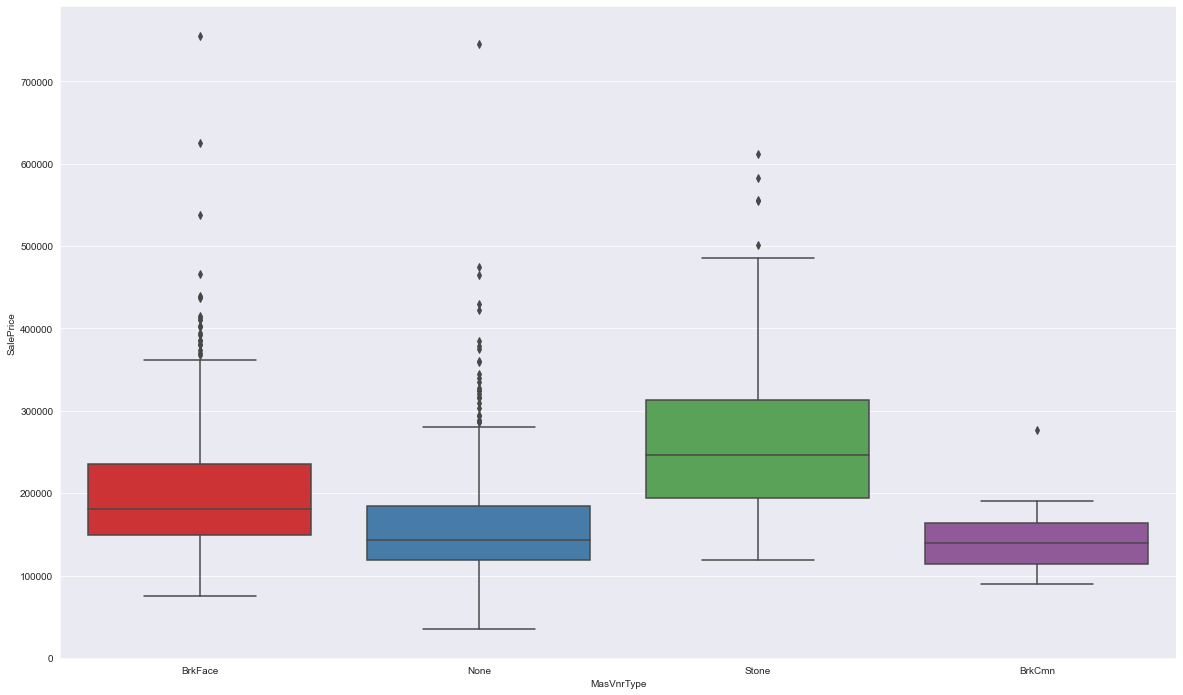

In [93]:
feature = 'MasVnrType'
dataBoxPlotVisualization(df,feature,'SalePrice')

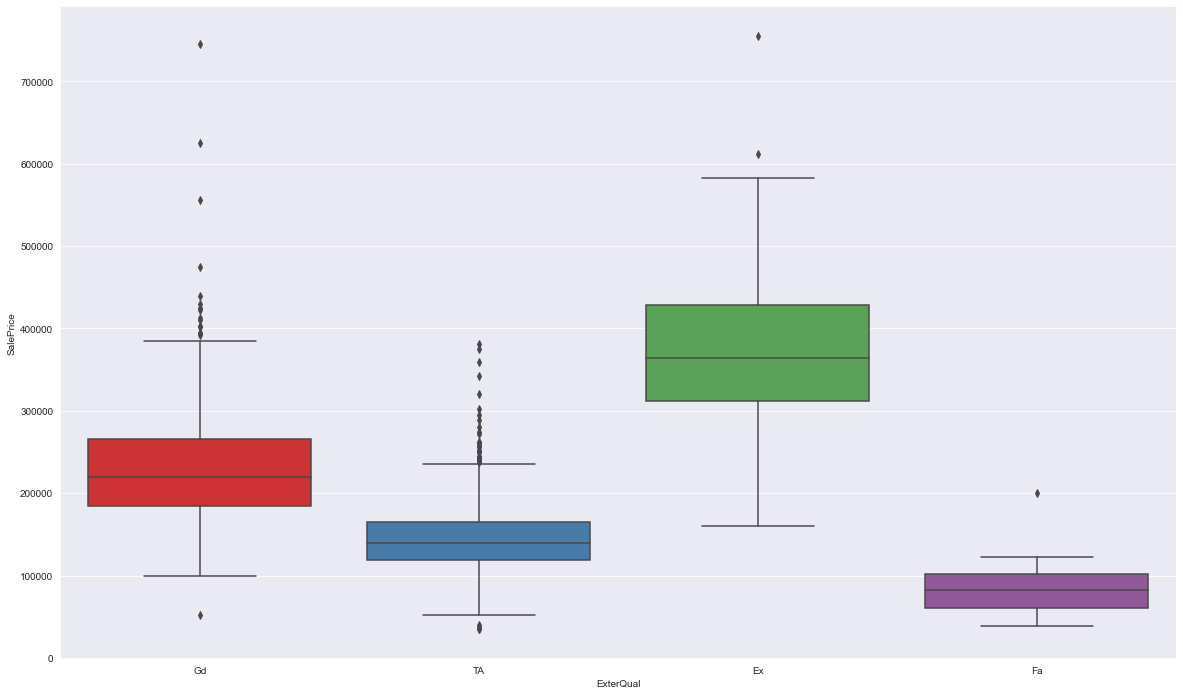

In [94]:
feature = 'ExterQual'
dataBoxPlotVisualization(df,feature,'SalePrice')

Exterior quality has great effect on sale price, Excellent has Higher sale price. Faie has negative effect on sale price.

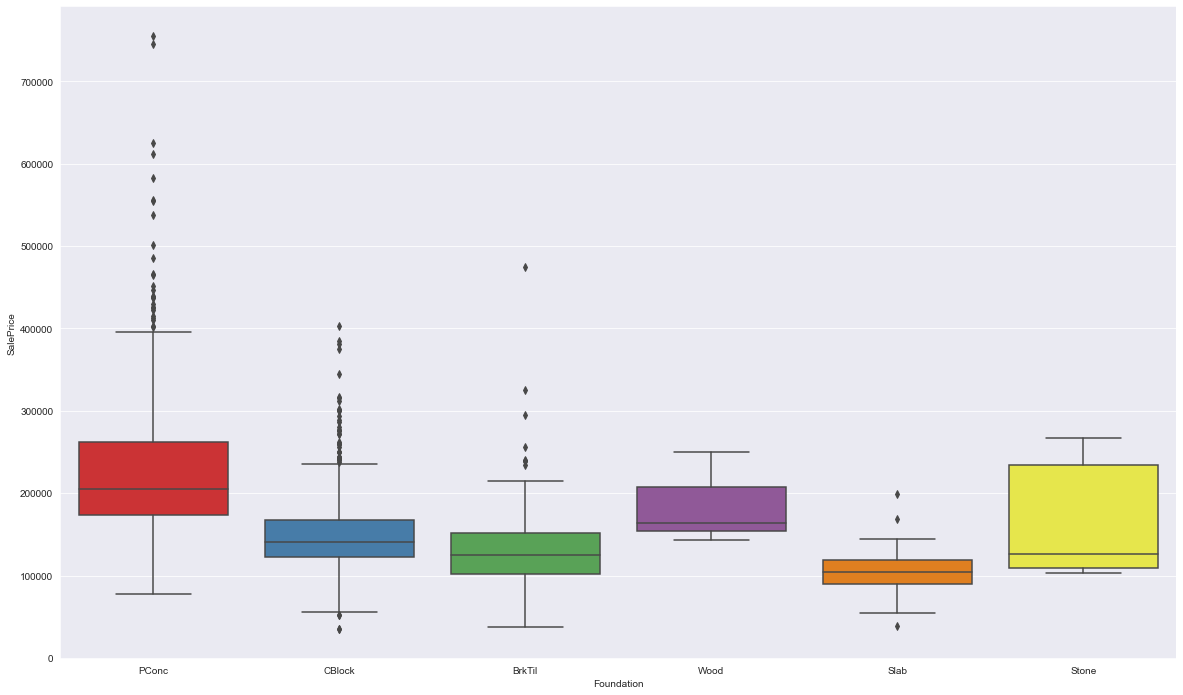

In [95]:
feature = 'Foundation'
dataBoxPlotVisualization(df,feature,'SalePrice')

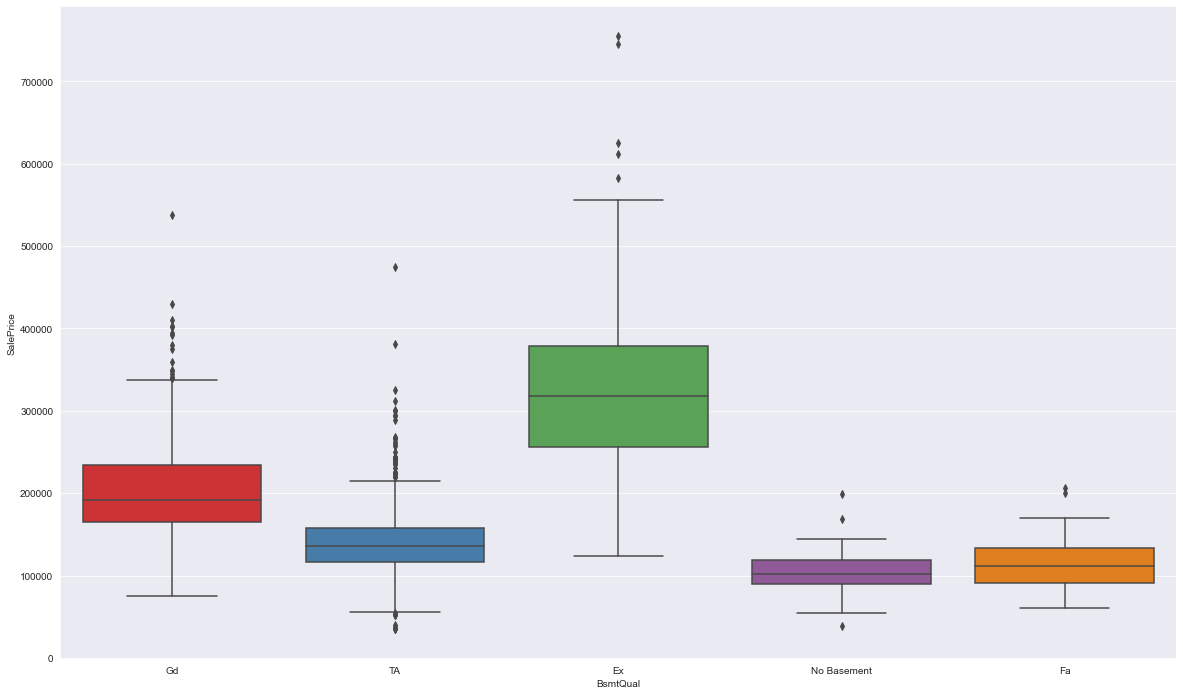

In [96]:
feature = 'BsmtQual'
dataBoxPlotVisualization(df,feature,'SalePrice')

Having basement with high cealings increased the cost of sale price tremendosuly. Noting having basement does not have high much effect instead of normall or low height.

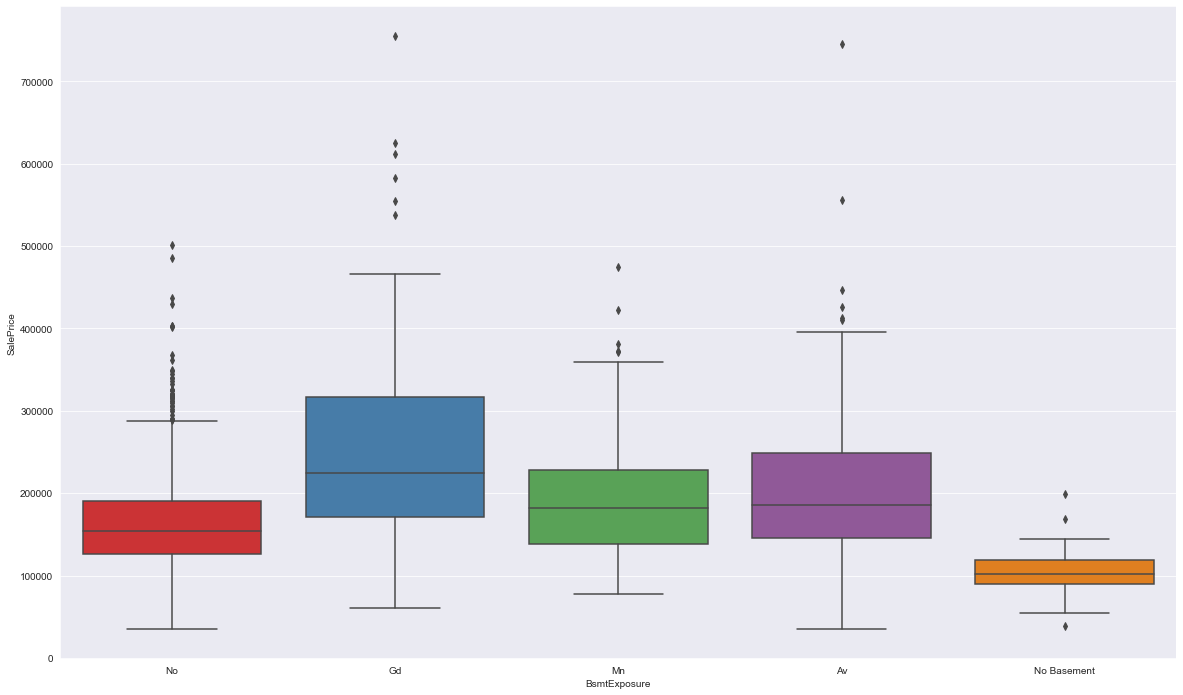

In [97]:
feature = 'BsmtExposure'
dataBoxPlotVisualization(df,feature,'SalePrice')

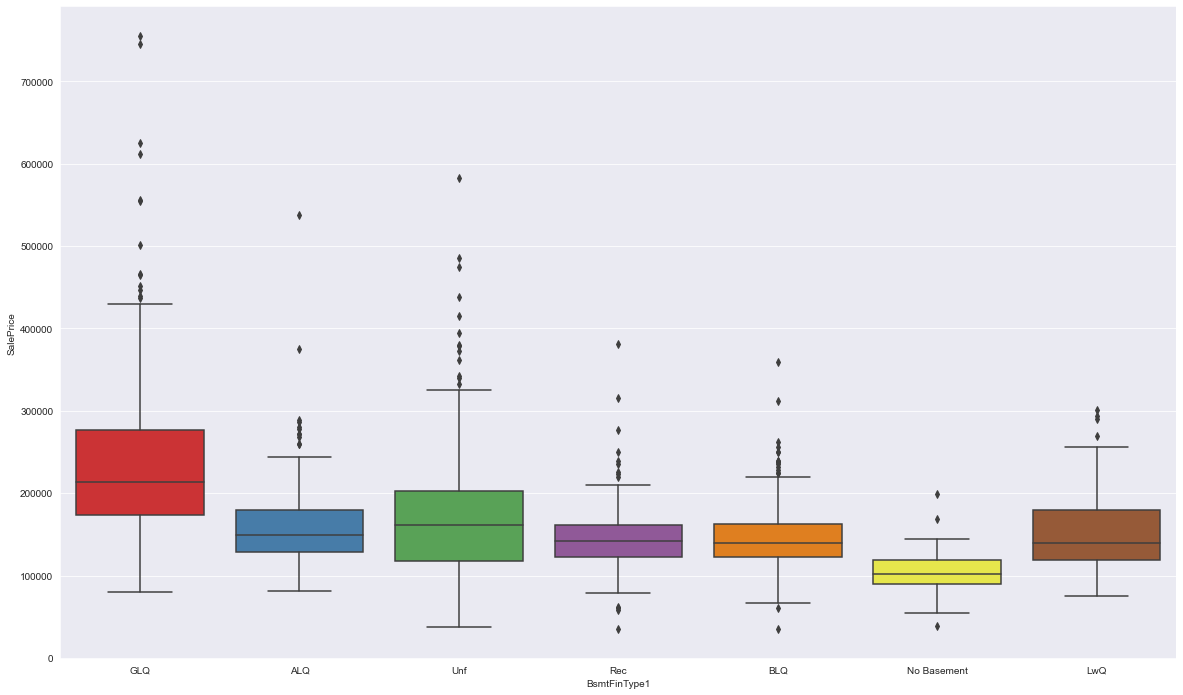

In [98]:
feature = 'BsmtFinType1'
dataBoxPlotVisualization(df,feature,'SalePrice')

Good Living quarters have higher sales price

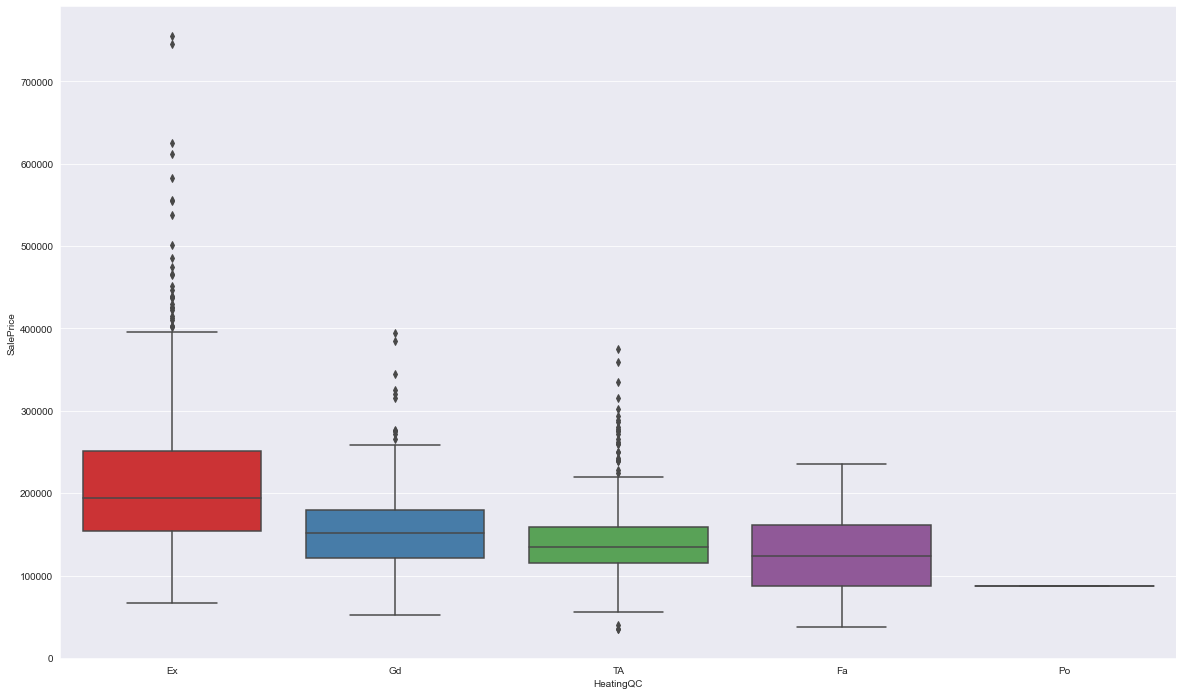

In [99]:
feature = 'HeatingQC'
dataBoxPlotVisualization(df,feature,'SalePrice')

As Expected Excelent heating quality and condition has higher Sale price

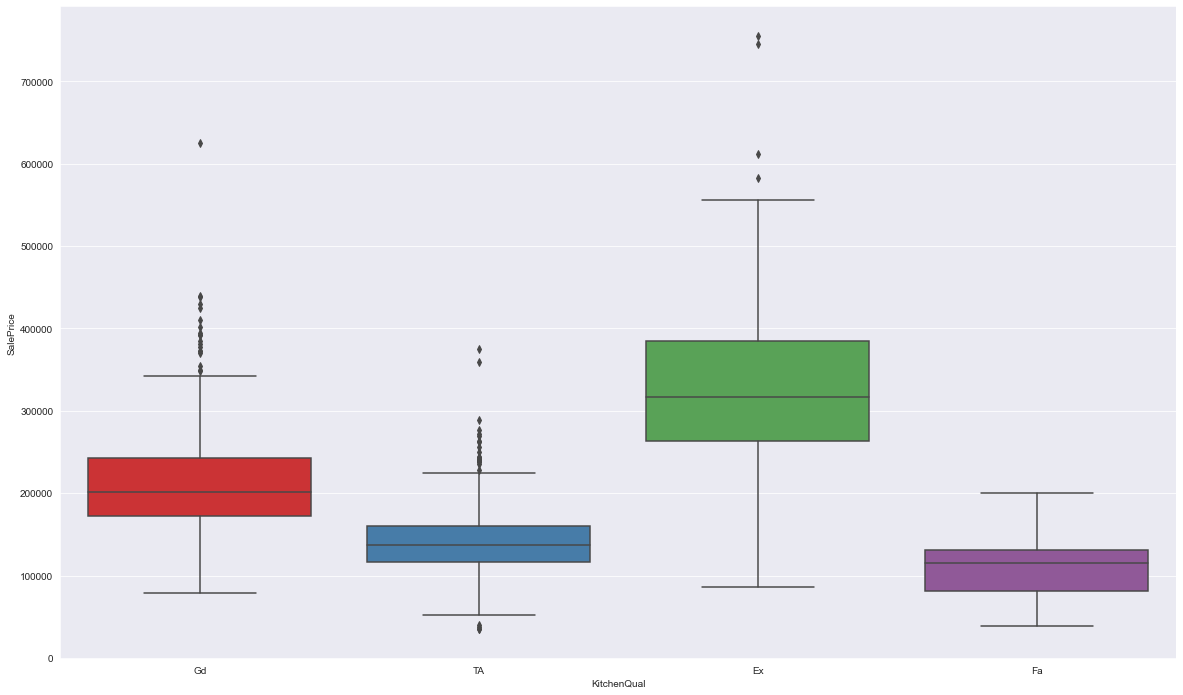

In [100]:
feature = 'KitchenQual'
dataBoxPlotVisualization(df,feature,'SalePrice')

Having a Excelent Kitchen quality has very positive effect on sale price

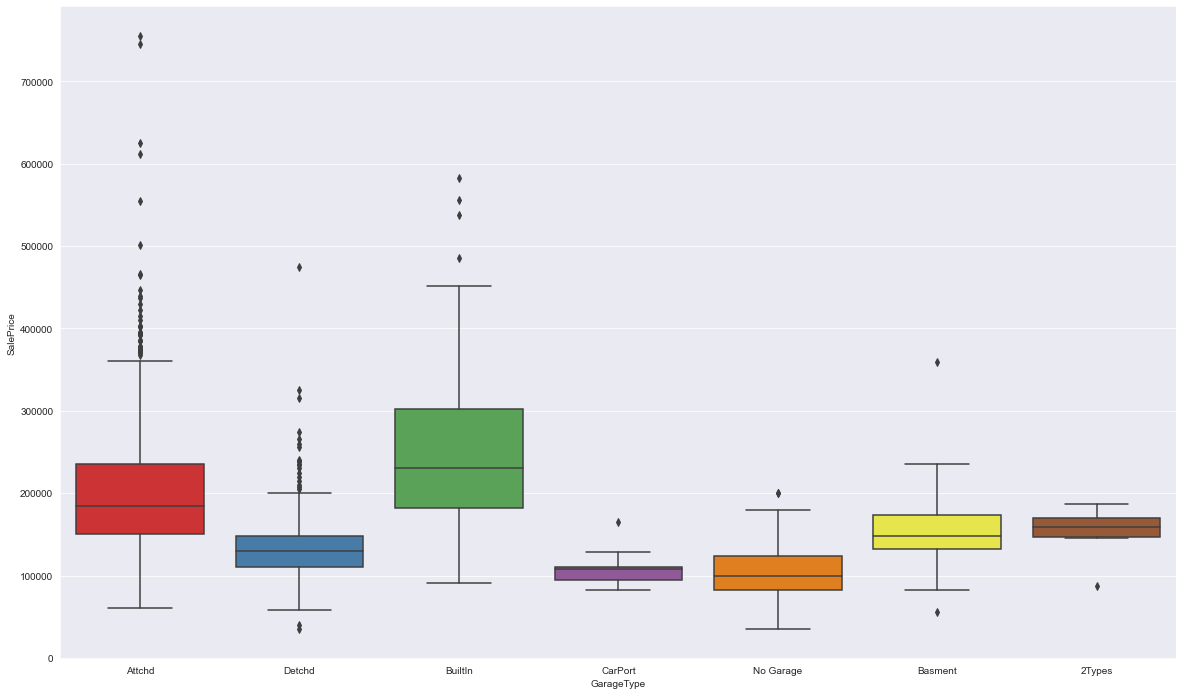

In [101]:
feature = 'GarageType'
dataBoxPlotVisualization(df,feature,'SalePrice')

Car Port has a negative effect on garage type. BuiltIn Gargae has increased the price of the house.

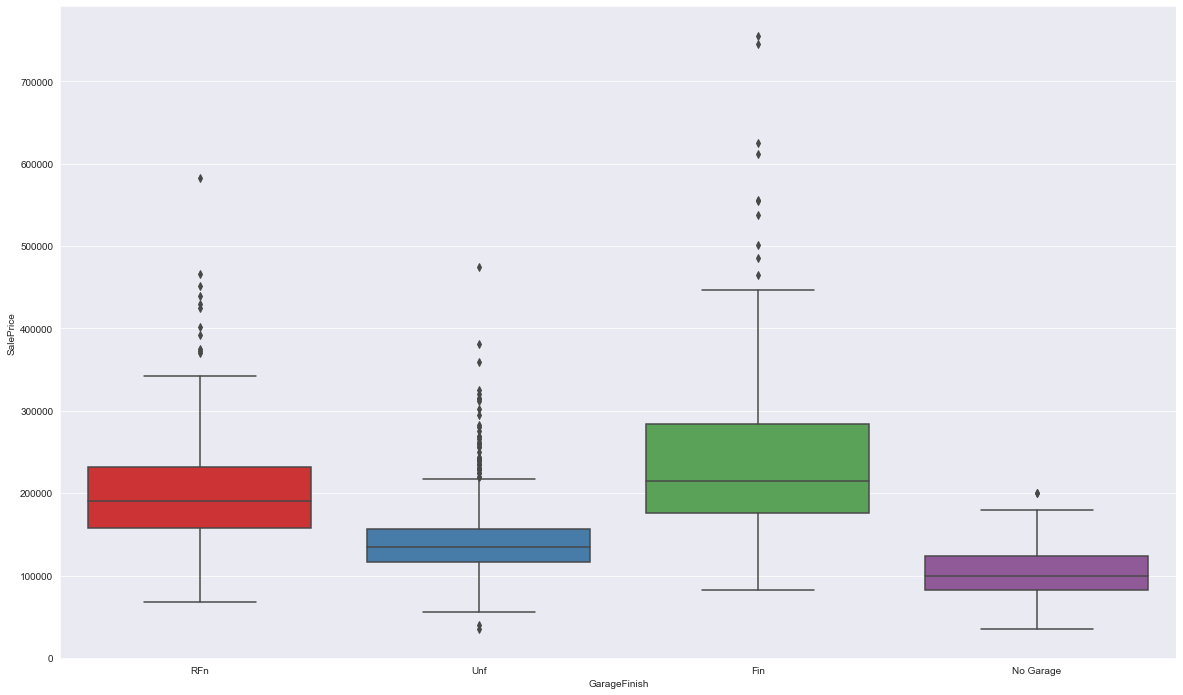

In [102]:
feature = 'GarageFinish'
dataBoxPlotVisualization(df,feature,'SalePrice')

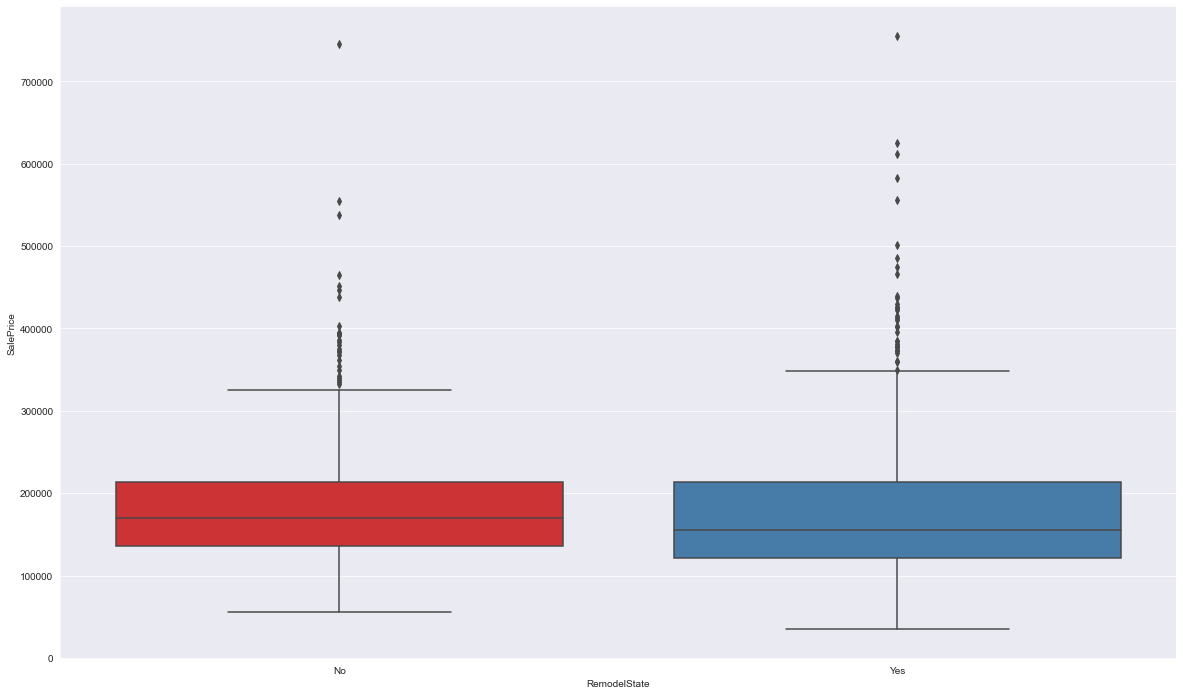

In [103]:
feature = 'RemodelState'
dataBoxPlotVisualization(df,feature,'SalePrice')

### Checking for Linear relationships

In [104]:
cont_features_x = list(cont_features.columns)
print(cont_features_x)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'houseAge', 'garageAge']


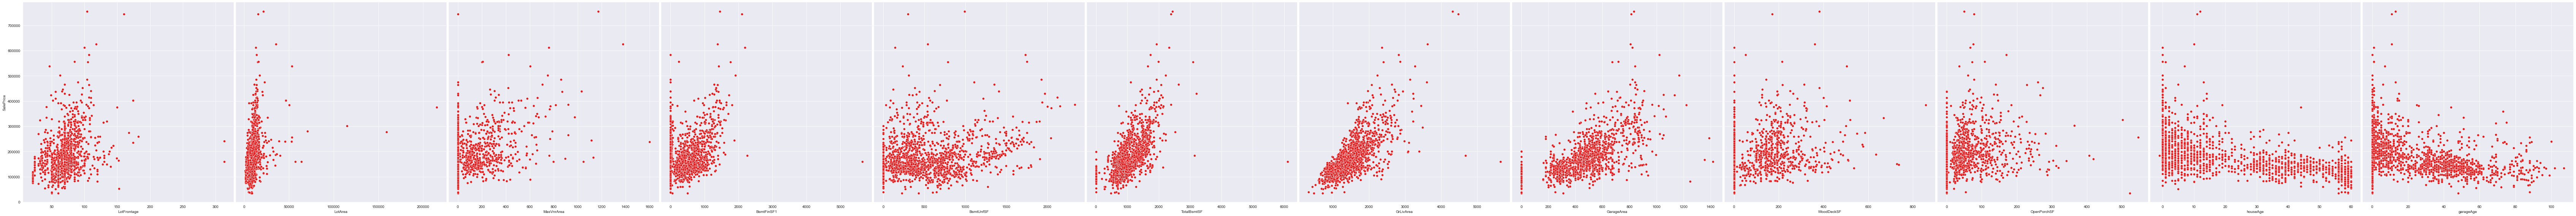

In [105]:
sns.set_style('darkgrid')
sns.set_palette('Set1')
sns.pairplot(data,  x_vars=cont_features_x, y_vars='SalePrice', size=8)
plt.show()



1.   General living area has linear relation with SalePrice
2.   Total basement square feet also has linear relation with SalePrice
3.   Garage area has a linear relation with SalePrice



# 2. Preparing data for modelling

## Creating dummy variables

In [106]:
df = dataGetDummies(df,list(df.select_dtypes(include=['object'])))
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,...,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,RemodelState_Yes
0,65.0,8450,196.0,706,150,856,1710,548,0,61,...,0,0,0,1,0,0,1,0,0,0
1,80.0,9600,0.0,978,284,1262,1262,460,298,0,...,0,0,0,1,0,0,1,0,0,0
2,68.0,11250,162.0,486,434,920,1786,608,0,42,...,0,0,0,1,0,0,1,0,0,1
3,60.0,9550,0.0,216,540,756,1717,642,0,35,...,1,0,0,0,1,0,0,1,0,1
4,84.0,14260,350.0,655,490,1145,2198,836,192,84,...,0,0,0,1,0,0,0,1,0,0


## Splitting the data into training and Testing sets

In [107]:
dftrain, dftest = train_test_data(df)
df_col = list(dftrain.columns)

## Scaling the variables

In [108]:
scaler = MinMaxScaler()
dftrain[df_col] = scaler.fit_transform(dftrain[df_col])
dftest[df_col] = scaler.transform(dftest[df_col])

In [109]:
ytrain = dftrain.pop('SalePrice')
Xtrain = dftrain
ytest = dftest.pop('SalePrice')
Xtest = dftest

In [110]:
Xtrain.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,...,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,RemodelState_Yes
114,0.136986,0.027048,0.000000,0.137137,0.044521,0.168249,0.374152,0.126939,0.261377,0.000000,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1056,0.075342,0.026080,0.150000,0.116761,0.301798,0.223241,0.194047,0.341326,0.224037,0.065814,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
367,0.273973,0.035894,0.190625,0.065734,0.311644,0.179869,0.206669,0.208745,0.074679,0.201097,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
308,0.167808,0.050826,0.000000,0.046421,0.256421,0.140917,0.099284,0.380113,0.184364,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1340,0.167808,0.031890,0.000000,0.000000,0.367295,0.140426,0.101356,0.338505,0.000000,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# 3. Building and evaluating model

## Ridge Regression

In [111]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(Xtrain, ytrain) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [113]:
#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(Xtrain, ytrain)

Ridge(alpha=4)

In [114]:
betas = pd.DataFrame(index=Xtrain.columns)
betas.index.name = 'Coef'
betas.rows = Xtrain.columns
betas['Ridge'] = ridge.coef_
betas

,Ridge
Coef,
LotFrontage,-0.006048
LotArea,0.043638
MasVnrArea,0.028500
BsmtFinSF1,0.031867
BsmtUnfSF,0.012262
...,...
GarageCars_1,-0.018478
GarageCars_2,-0.009757
GarageCars_3,0.022047


In [115]:
ytrain_pred = ridge.predict(Xtrain)
ytest_pred = ridge.predict(Xtest)

,Value
Metrics,
RMS,0.034125
RSquared,0.906239
RSS,1.186647
MSE,0.001165
RMSE,0.034125


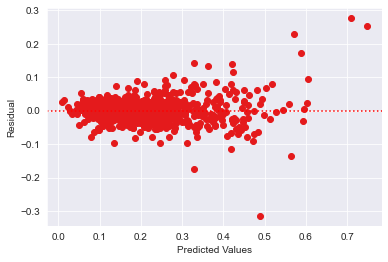

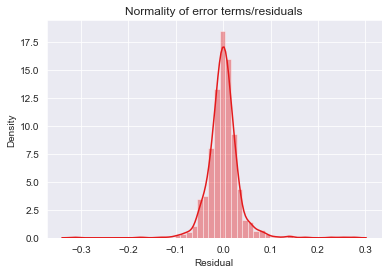

In [116]:
train_analysis_df = test_data_linear_reg_analysis(ytrain, ytrain_pred)
train_analysis_df = train_analysis_df.rename(columns={'Value': 'Ridge(Train)'})

,Value
Metrics,
RMS,0.044332
RSquared,0.831413
RSS,0.858836
MSE,0.001965
RMSE,0.044332


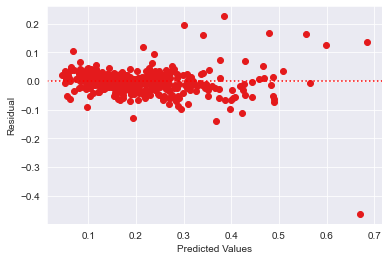

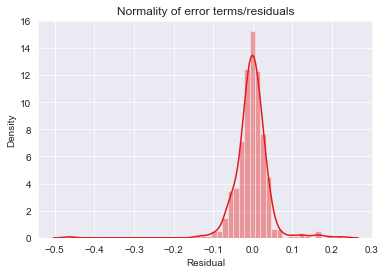

In [117]:
test_analysis_df = test_data_linear_reg_analysis(ytest, ytest_pred)
test_analysis_df = test_analysis_df.rename(columns={'Value': 'Ridge (Test)'})

In [118]:
metrics = pd.concat([train_analysis_df, test_analysis_df], axis=1)
metrics

,Ridge(Train),Ridge (Test)
Metrics,,
RMS,0.034125,0.044332
RSquared,0.906239,0.831413
RSS,1.186647,0.858836
MSE,0.001165,0.001965
RMSE,0.034125,0.044332


## Lasso Regression

In [119]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(Xtrain, ytrain) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [120]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [121]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(Xtrain, ytrain)

Lasso(alpha=0.0001)

In [122]:
betas['Lasso'] = lasso.coef_
betas

,Ridge,Lasso
Coef,,
LotFrontage,-0.006048,-0.015353
LotArea,0.043638,0.101347
MasVnrArea,0.028500,0.019063
BsmtFinSF1,0.031867,0.005358
BsmtUnfSF,0.012262,0.000000
...,...,...
GarageCars_1,-0.018478,-0.006955
GarageCars_2,-0.009757,0.000000
GarageCars_3,0.022047,0.032698


In [123]:
ytrain_pred = lasso.predict(Xtrain)
ytest_pred = lasso.predict(Xtest)

,Value
Metrics,
RMS,0.033241
RSquared,0.911034
RSS,1.125961
MSE,0.001105
RMSE,0.033241


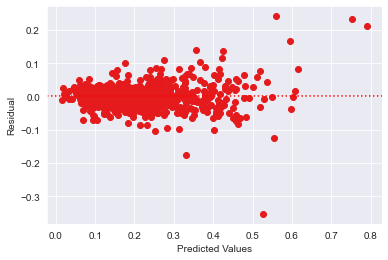

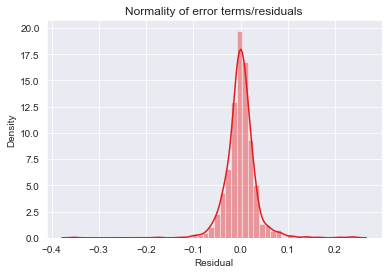

In [124]:
train_analysis_df = test_data_linear_reg_analysis(ytrain, ytrain_pred)
train_analysis_df = train_analysis_df.rename(columns={'Value': 'Lasso(Train)'})

,Value
Metrics,
RMS,0.045434
RSquared,0.822928
RSS,0.902059
MSE,0.002064
RMSE,0.045434


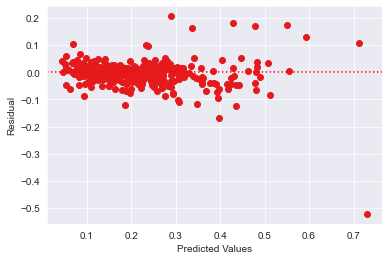

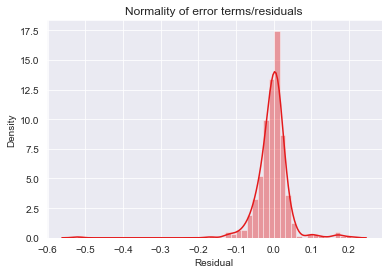

In [125]:
test_analysis_df = test_data_linear_reg_analysis(ytest, ytest_pred)
test_analysis_df = test_analysis_df.rename(columns={'Value': 'Lasso (Test)'})

In [126]:
metrics = pd.concat([metrics, train_analysis_df, test_analysis_df], axis=1)
metrics

,Ridge(Train),Ridge (Test),Lasso(Train),Lasso (Test)
Metrics,,,,
RMS,0.034125,0.044332,0.033241,0.045434
RSquared,0.906239,0.831413,0.911034,0.822928
RSS,1.186647,0.858836,1.125961,0.902059
MSE,0.001165,0.001965,0.001105,0.002064
RMSE,0.034125,0.044332,0.033241,0.045434


In [127]:
from IPython.core.display import HTML
display(HTML(betas.to_html()))
betas.to_html(open('AusHousingBetas.html', 'w'))

,Ridge,Lasso
Coef,,
LotFrontage,-0.006048,-1.535346e-02
LotArea,0.043638,1.013470e-01
MasVnrArea,0.028500,1.906263e-02
BsmtFinSF1,0.031867,5.357919e-03
BsmtUnfSF,0.012262,0.000000e+00
TotalBsmtSF,0.043189,0.000000e+00
GrLivArea,0.097003,3.255604e-01
GarageArea,0.018050,0.000000e+00
WoodDeckSF,0.024448,2.002390e-02


In [128]:
betas.sort_values(by=['Ridge'])

,Ridge,Lasso
Coef,,
ExterQual_Fa,-0.032999,-0.034394
BsmtQual_TA,-0.032339,-0.031430
KitchenQual_Gd,-0.031163,-0.029988
BsmtQual_Fa,-0.029871,-0.030116
KitchenQual_TA,-0.029410,-0.028702
...,...,...
OverallQual_9,0.049608,0.075424
OverallQual_10,0.050868,0.073076
Neighborhood_NoRidge,0.058598,0.057888


In [129]:
betas.sort_values(by=['Lasso'])

,Ridge,Lasso
Coef,,
Fireplaces_3,-0.028496,-0.056051
BsmtQual_No Basement,-0.014428,-0.040317
ExterQual_Fa,-0.032999,-0.034394
BsmtQual_TA,-0.032339,-0.031430
BsmtQual_Fa,-0.029871,-0.030116
...,...,...
OverallQual_10,0.050868,0.073076
OverallQual_9,0.049608,0.075424
FullBath_3,0.074003,0.085690


In [156]:
list(betas.loc[betas['Lasso'] == 0].index)

['BsmtUnfSF',
 'TotalBsmtSF',
 'GarageArea',
 'garageAge',
 'MSSubClass_40',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSZoning_RH',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_NPkVill',
 'Neighborhood_Timber',
 'HouseStyle_2.5Unf',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'OverallQual_2',
 'OverallQual_6',
 'OverallCond_2',
 'OverallCond_5',
 'OverallCond_9',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Shed',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 

### Final Conclusion from the model
* LotFrontage has negative effect on the housing price. Lot of coustomers are perfering not to have a big road connecting to there lot. This sits with the analysis before that say's Mean for homes in viallages and isolated neighbour hoods is high
* LotArea, TotalBsmtSF, GrLivArea,  is positive effect as expected
* Finished basement is increasing the house price
* House Age and Garage Age, Older houses tend to have lower sale price
* House price is effected by the dwelling of the house
* Neighborhood is having effect on sale price. There are neighbour hoods where people prefer to over others
    * Blueste , BrDale , CollgCr , Edwards , Gilbert , IDOTRR , MeadowV , Mitchel , NAmes , NPkVill , NWAmes , OldTown , SWISU , Sawyer People prefer these neighbourhood over others
    * BrkSid , ClearC , Crawfo , NoRidg , NridgH , Sawyer , Somers , StoneB , Timbe , Veenke are not prefering these neighbourhoods.
* Over all quality needs to be greater then 6 to have a positive effect on saleprice
* Over all condition needs to be atleast 5
* People are perfering 3 full bath over 1 and 2
* Coustomers what bedroom above ground
* Coustomers prefer to have atleast 9 rooms with 3 full bath
* Coustomers dont like to have more then one Full bath in basement
* Coustomers dont like carport
* Coustomers prefer with atlest 3 garage cars
* Remodeling has minimum effect on the sale price

### Ridge with double alpha

In [140]:
alpha = 4
ridge = Ridge(alpha=alpha*2)

ridge.fit(Xtrain, ytrain)

Ridge(alpha=8)

In [141]:
betas['Ridge_twice_alpha'] = ridge.coef_
betas

,Ridge,Lasso,Ridge_twice_alpha
Coef,,,
LotFrontage,-0.006048,-0.015353,0.001642
LotArea,0.043638,0.101347,0.026213
MasVnrArea,0.028500,0.019063,0.026001
BsmtFinSF1,0.031867,0.005358,0.025946
BsmtUnfSF,0.012262,0.000000,0.015011
...,...,...,...
GarageCars_1,-0.018478,-0.006955,-0.016789
GarageCars_2,-0.009757,0.000000,-0.008556
GarageCars_3,0.022047,0.032698,0.026110


In [142]:
ytrain_pred = ridge.predict(Xtrain)
ytest_pred = ridge.predict(Xtest)

,Value
Metrics,
RMS,0.035398
RSquared,0.899114
RSS,1.276832
MSE,0.001253
RMSE,0.035398


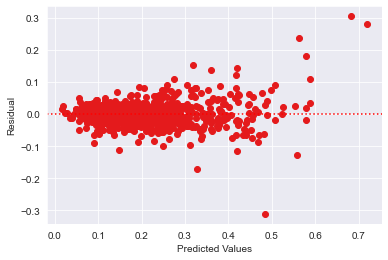

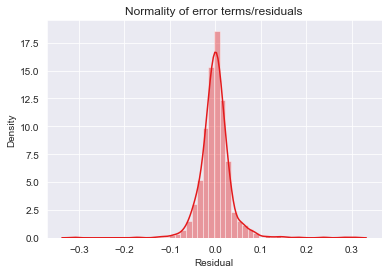

In [143]:
train_analysis_df = test_data_linear_reg_analysis(ytrain, ytrain_pred)
train_analysis_df = train_analysis_df.rename(columns={'Value': 'Ridge twice alpha(Train)'})

,Value
Metrics,
RMS,0.044057
RSquared,0.833494
RSS,0.848235
MSE,0.001941
RMSE,0.044057


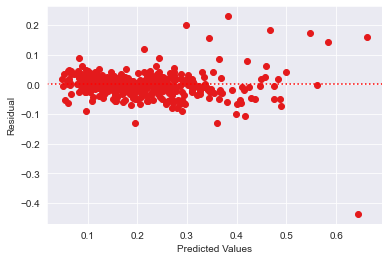

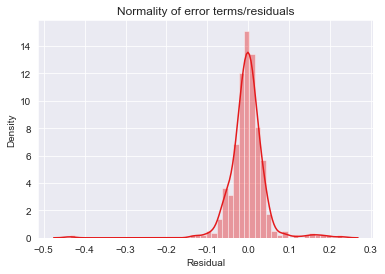

In [144]:
test_analysis_df = test_data_linear_reg_analysis(ytest, ytest_pred)
test_analysis_df = test_analysis_df.rename(columns={'Value': 'Ridge twice alpha (Test)'})

In [145]:
metrics = pd.concat([metrics, train_analysis_df, test_analysis_df], axis=1)
metrics

,Ridge(Train),Ridge (Test),Lasso(Train),Lasso (Test),Ridge twice alpha(Train),Ridge twice alpha (Test)
Metrics,,,,,,
RMS,0.034125,0.044332,0.033241,0.045434,0.035398,0.044057
RSquared,0.906239,0.831413,0.911034,0.822928,0.899114,0.833494
RSS,1.186647,0.858836,1.125961,0.902059,1.276832,0.848235
MSE,0.001165,0.001965,0.001105,0.002064,0.001253,0.001941
RMSE,0.034125,0.044332,0.033241,0.045434,0.035398,0.044057


### Lasso with double alpha

In [146]:
alpha = 0.0001
lasso = Lasso(alpha=alpha*2)

lasso.fit(Xtrain, ytrain)

Lasso(alpha=0.0002)

In [147]:
betas['Lasso_twice_alpha'] = lasso.coef_
betas

,Ridge,Lasso,Ridge_twice_alpha,Lasso_twice_alpha
Coef,,,,
LotFrontage,-0.006048,-0.015353,0.001642,-0.000000
LotArea,0.043638,0.101347,0.026213,0.007931
MasVnrArea,0.028500,0.019063,0.026001,0.013362
BsmtFinSF1,0.031867,0.005358,0.025946,0.000000
BsmtUnfSF,0.012262,0.000000,0.015011,0.000000
...,...,...,...,...
GarageCars_1,-0.018478,-0.006955,-0.016789,-0.006628
GarageCars_2,-0.009757,0.000000,-0.008556,0.000000
GarageCars_3,0.022047,0.032698,0.026110,0.037435


In [148]:
ytrain_pred = lasso.predict(Xtrain)
ytest_pred = lasso.predict(Xtest)

,Value
Metrics,
RMS,0.035042
RSquared,0.901130
RSS,1.251308
MSE,0.001228
RMSE,0.035042


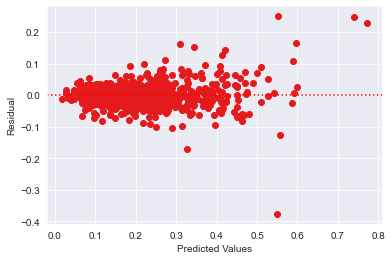

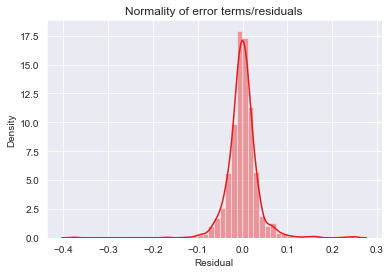

In [149]:
train_analysis_df = test_data_linear_reg_analysis(ytrain, ytrain_pred)
train_analysis_df = train_analysis_df.rename(columns={'Value': 'Lasso twice alpha(Train)'})

,Value
Metrics,
RMS,0.045066
RSquared,0.825778
RSS,0.887542
MSE,0.002031
RMSE,0.045066


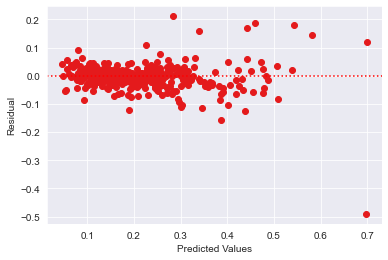

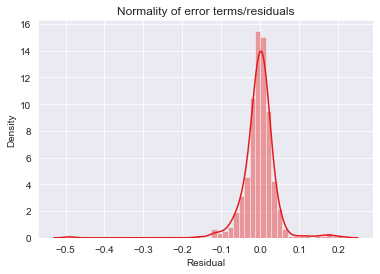

In [150]:
test_analysis_df = test_data_linear_reg_analysis(ytest, ytest_pred)
test_analysis_df = test_analysis_df.rename(columns={'Value': 'Lasso twice alpha (Test)'})

In [151]:
metrics = pd.concat([metrics, train_analysis_df, test_analysis_df], axis=1)
metrics

,Ridge(Train),Ridge (Test),Lasso(Train),Lasso (Test),Ridge twice alpha(Train),Ridge twice alpha (Test),Lasso twice alpha(Train),Lasso twice alpha (Test)
Metrics,,,,,,,,
RMS,0.034125,0.044332,0.033241,0.045434,0.035398,0.044057,0.035042,0.045066
RSquared,0.906239,0.831413,0.911034,0.822928,0.899114,0.833494,0.901130,0.825778
RSS,1.186647,0.858836,1.125961,0.902059,1.276832,0.848235,1.251308,0.887542
MSE,0.001165,0.001965,0.001105,0.002064,0.001253,0.001941,0.001228,0.002031
RMSE,0.034125,0.044332,0.033241,0.045434,0.035398,0.044057,0.035042,0.045066


In [152]:
betas.sort_values(by=['Ridge_twice_alpha'])

,Ridge,Lasso,Ridge_twice_alpha,Lasso_twice_alpha
Coef,,,,
KitchenQual_Gd,-0.031163,-0.029988,-0.029407,-0.029199
ExterQual_Fa,-0.032999,-0.034394,-0.028972,-0.026369
BsmtQual_TA,-0.032339,-0.031430,-0.028916,-0.024379
FullBath_1,-0.026094,-0.006219,-0.028708,-0.006798
KitchenQual_TA,-0.029410,-0.028702,-0.028321,-0.029526
...,...,...,...,...
OverallQual_9,0.049608,0.075424,0.043348,0.079354
OverallQual_10,0.050868,0.073076,0.044568,0.078867
Neighborhood_NoRidge,0.058598,0.057888,0.050716,0.054012


In [153]:
betas.sort_values(by=['Lasso_twice_alpha'])

,Ridge,Lasso,Ridge_twice_alpha,Lasso_twice_alpha
Coef,,,,
BsmtQual_No Basement,-0.014428,-0.040317,-0.012914,-0.034317
Fireplaces_3,-0.028496,-0.056051,-0.016876,-0.030733
KitchenQual_TA,-0.029410,-0.028702,-0.028321,-0.029526
KitchenQual_Gd,-0.031163,-0.029988,-0.029407,-0.029199
KitchenQual_Fa,-0.027259,-0.028275,-0.024348,-0.027850
...,...,...,...,...
Neighborhood_NoRidge,0.058598,0.057888,0.050716,0.054012
OverallQual_10,0.050868,0.073076,0.044568,0.078867
OverallQual_9,0.049608,0.075424,0.043348,0.079354


In [155]:
list(betas.loc[betas['Lasso_twice_alpha'] == 0].index)

['LotFrontage',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageArea',
 'garageAge',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_180',
 'MSZoning_RH',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_SawyerW',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'OverallQual_2',
 'OverallQual_6',
 'OverallCond_2',
 'OverallCond_5',
 'OverallCond_9',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterio

In [158]:
list(betas.loc[(betas['Lasso_twice_alpha'] == 0) & betas['Lasso'] != 0].index)

['LotFrontage',
 'BsmtFinSF1',
 'MSSubClass_45',
 'MSSubClass_70',
 'MSSubClass_180',
 'Neighborhood_Mitchel',
 'Neighborhood_NWAmes',
 'Neighborhood_SawyerW',
 'Neighborhood_Veenker',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2Story',
 'RoofStyle_Mansard',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_ImStucc',
 'MasVnrType_None',
 'BsmtExposure_Mn',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFullBath_2',
 'BedroomAbvGr_2',
 'BedroomAbvGr_5',
 'TotRmsAbvGrd_7',
 'TotRmsAbvGrd_8',
 'TotRmsAbvGrd_11',
 'TotRmsAbvGrd_12',
 'GarageType_BuiltIn',
 'GarageCars_4']

### Dropping top 5 features

#### Ridge Regression

In [ ]:
ridge_to_drop = ['OverallQual_9', 'OverallQual_10','Neighborhood_NoRidge', 'FullBath_3', 'GrLivArea']

Xtrain_ridge = Xtrain.drop(ridge_to_drop)
Xtest_ridge = Xtest.drop(ridge_to_drop)

#### Lasso Regression

In [ ]:
lasso_to_drop = ['OverallQual_10', 'OverallQual_9', 'FullBath_3', 'LotArea', 'GrLivArea']

Xtrain_lasso = Xtrain.drop(lasso_to_drop)
Xtest_lasso = Xtest.drop(lasso_to_drop)